In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix,classification_report, multilabel_confusion_matrix
from dataclasses import dataclass
from scipy.stats import norm
from datetime import datetime
from sklearn.preprocessing import minmax_scale, StandardScaler
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [158]:
# Define column names
md = [' ?','NaN']
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]
url = 'https://raw.githubusercontent.com/palakodeti2908/Census-Income/main/adult.data'
df = pd.read_csv(url,header = None, names = column_names,na_values=md )

In [159]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Data Pre-Processing

In [160]:
#Count the number of missing values in each column of the DataFrame
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [161]:
# Calculate percentage distribution for each column
for column in df.columns:
    if df[column].dtype == 'O':  # Check if the column has an object (string) data type
        percentage_distribution = df[column].value_counts()
        print(f"Percentage distribution for {column}:\n{percentage_distribution}\n")
    else:
        print(f"{column} is not an object (string) column.\n")

age is not an object (string) column.

Percentage distribution for workclass:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

fnlwgt is not an object (string) column.

Percentage distribution for education:
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

education_num is not an object (string) column.

Percentage distribution for marital_status:
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separ

In [162]:
# Remove rows with missing values from the DataFrame
df.dropna(inplace= True)

In [163]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [164]:
# Dropping duplicate rows
df.drop_duplicates()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


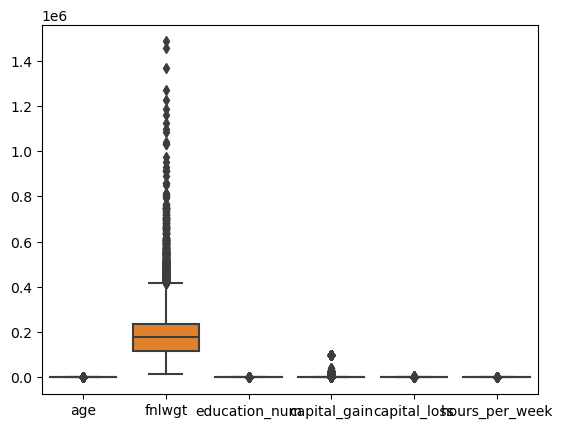

In [166]:
# Creating a boxplot for the columns of the dataframe
sns.boxplot(data=df)
plt.show()

In [167]:
# Replacing the values in a specific coolumn
df['income'].replace(' >50K.', '>50K', inplace=True)
df['income'].replace(' <=50K.', '<=50K', inplace=True)

In [168]:
# Count the number of numeric columns in the DataFrame
num_cols_count = df.select_dtypes(include='number').shape[1]

# Specify the desired number of columns per row for visualization
cols_per_row = 3

# Calculate the number of rows needed for the visualization layout
num_rows = (num_cols_count - 1) // cols_per_row + 1

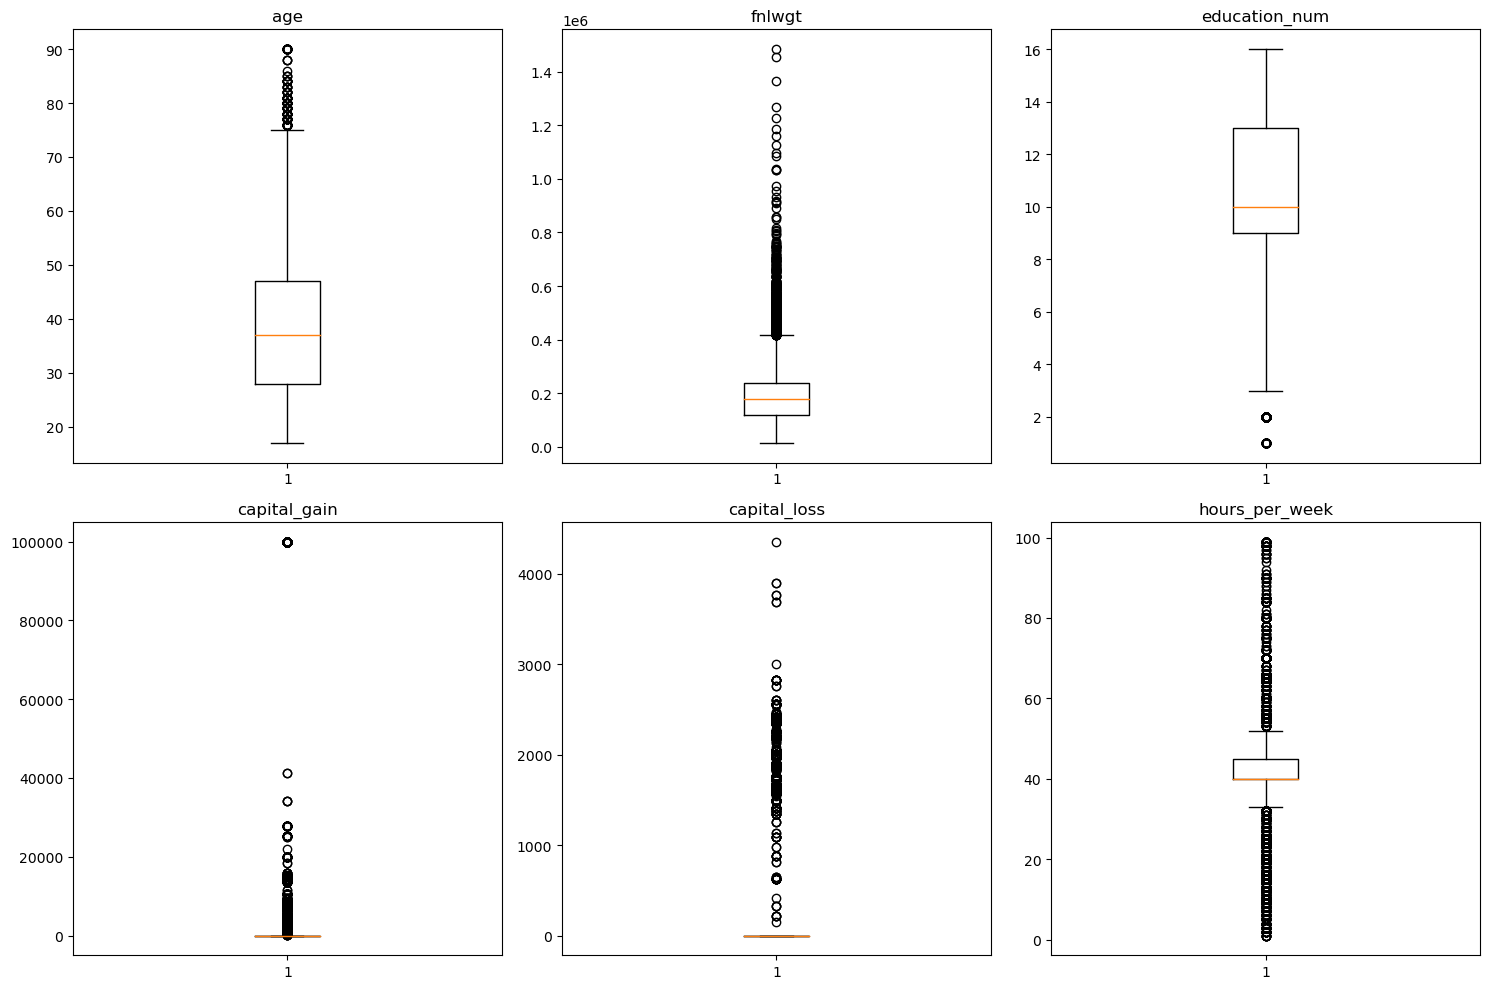

In [169]:

numeric_columns = df.select_dtypes(include='number').columns
num_cols_count = len(numeric_columns)
cols_per_row = 3

# Calculate the number of rows needed
num_rows = (num_cols_count - 1) // cols_per_row + 1
total_subplots = num_rows * cols_per_row

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot boxplots for each numeric column
for i, col in enumerate(numeric_columns):
    if i < total_subplots:
        ax = axes[i]
        ax.boxplot(df[col])
        ax.set_title(col)
    else:
        break

# Turn off extra subplots if there are fewer numeric columns than total_subplots
for j in range(num_cols_count, total_subplots):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


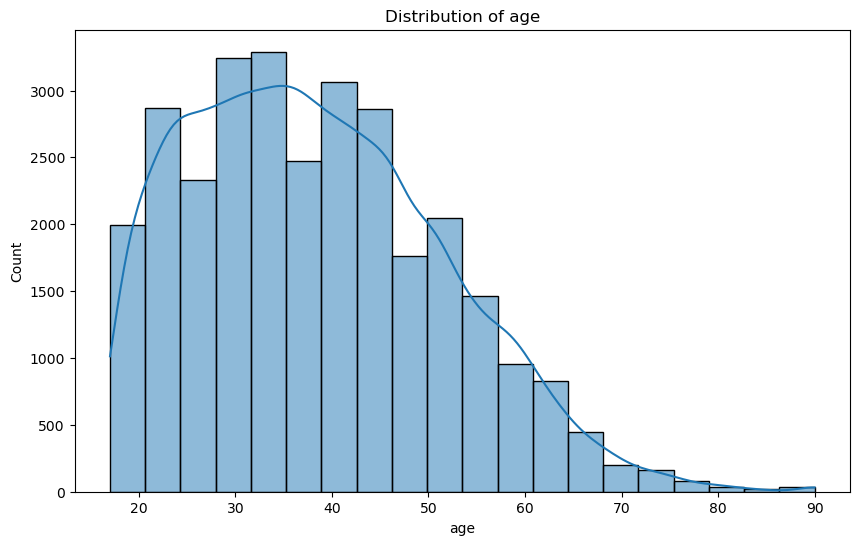

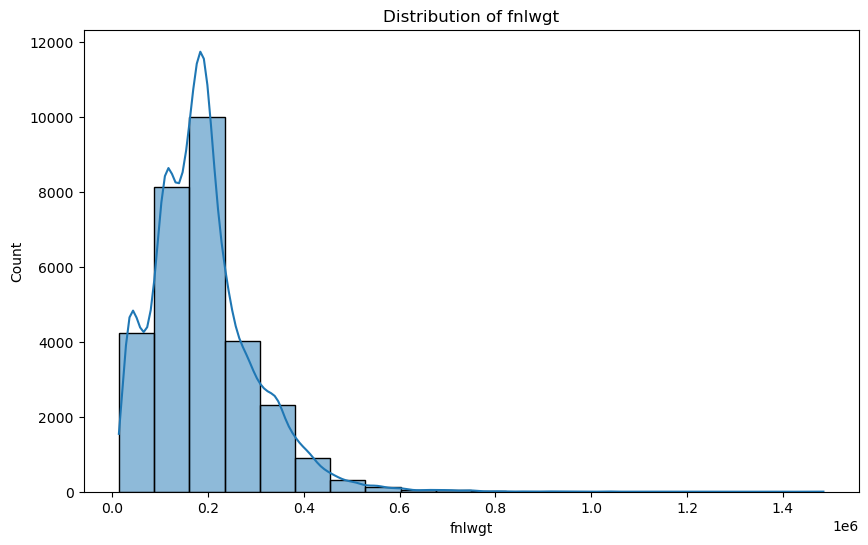

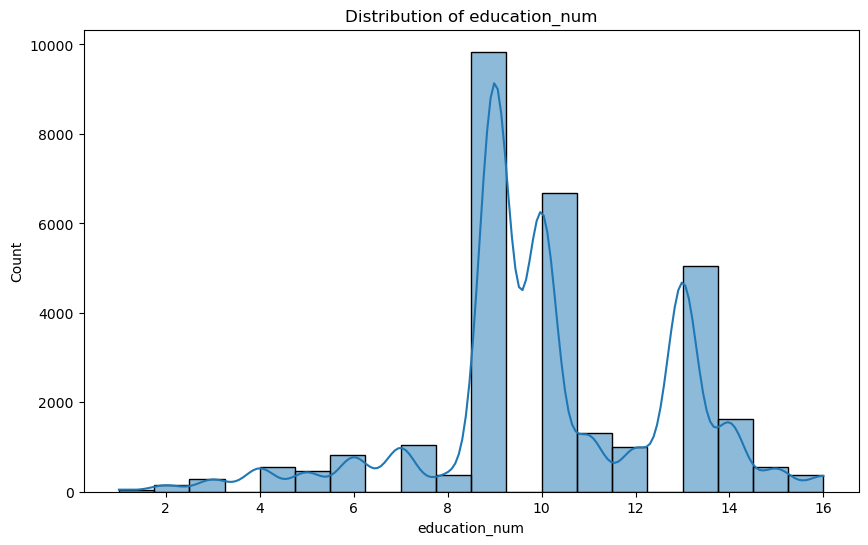

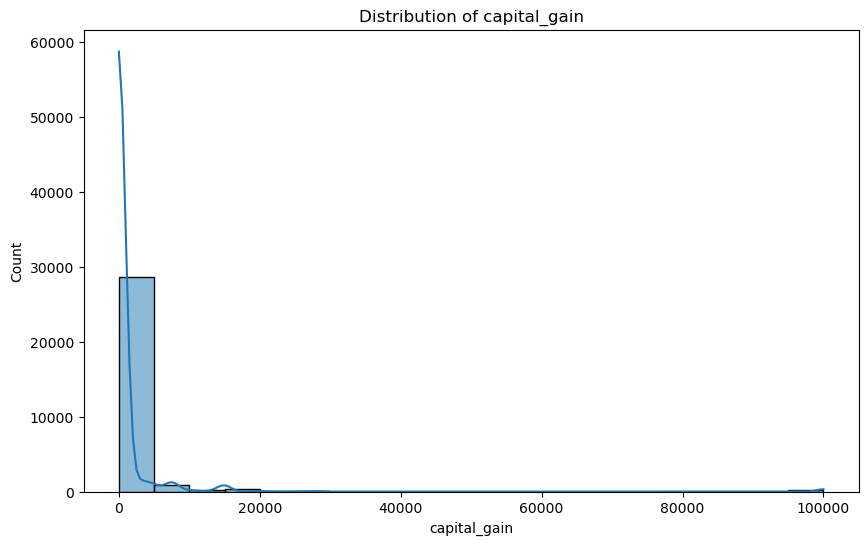

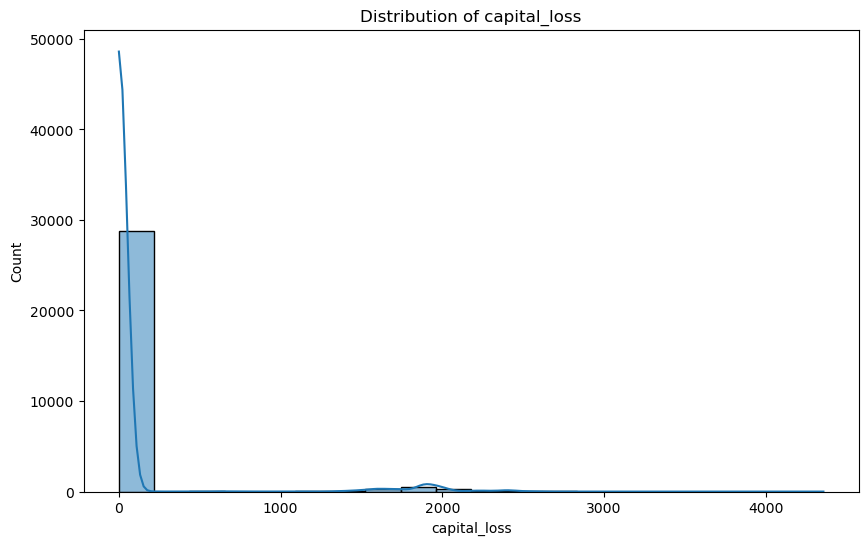

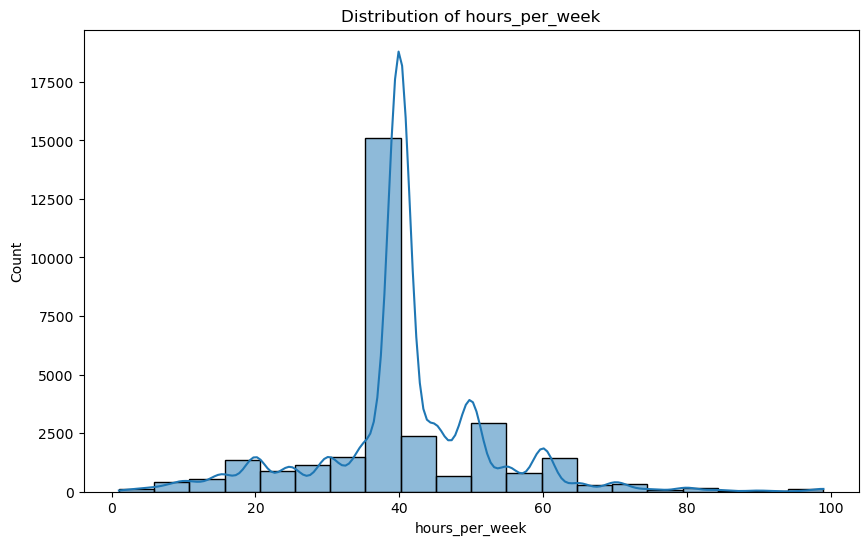

In [170]:
# Get numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create distribution plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

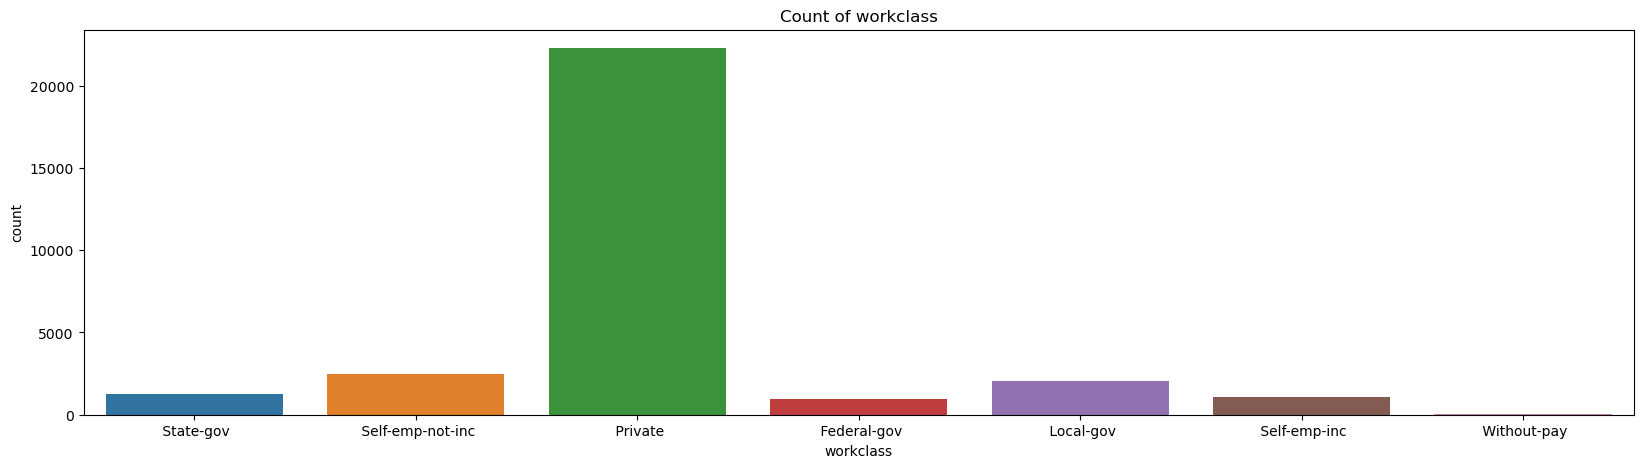

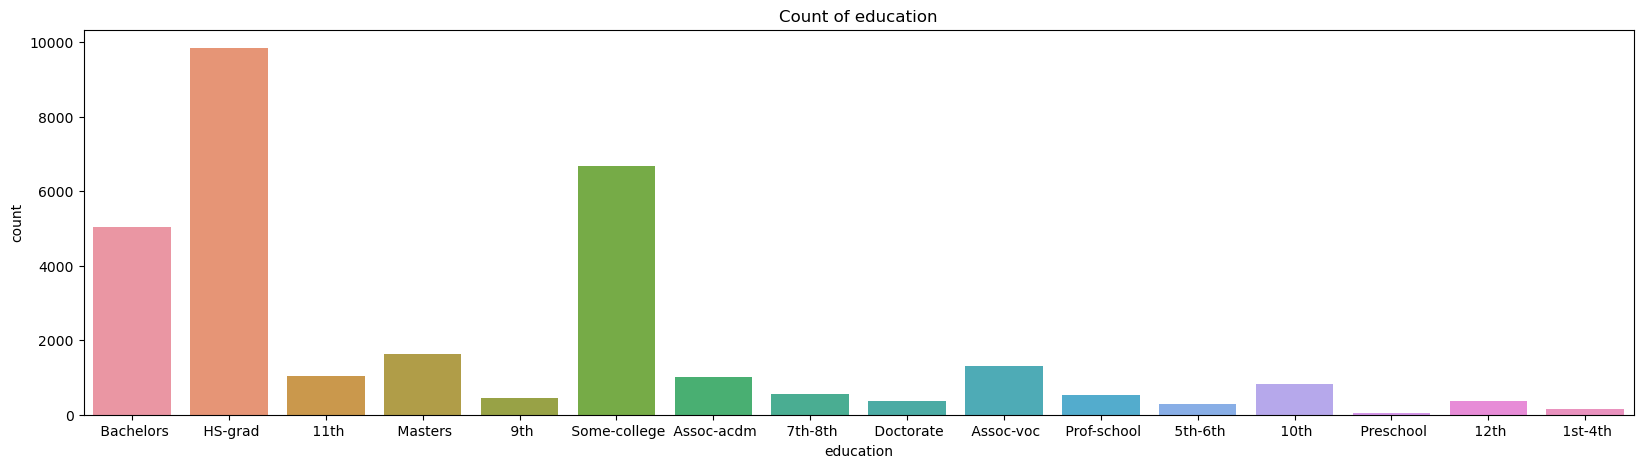

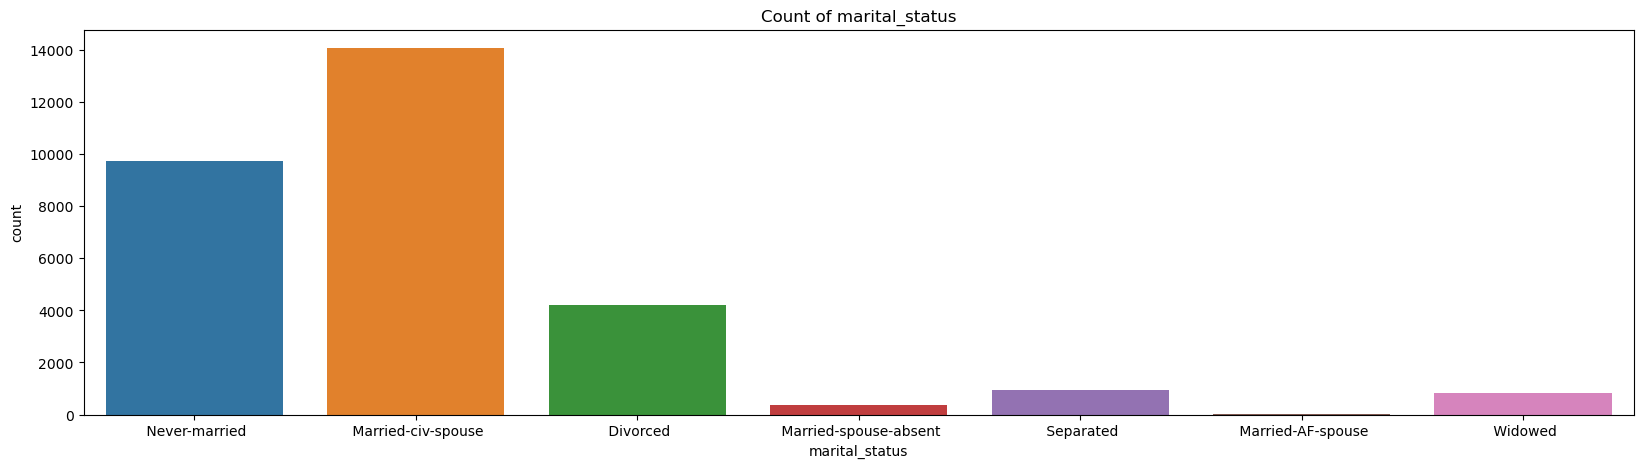

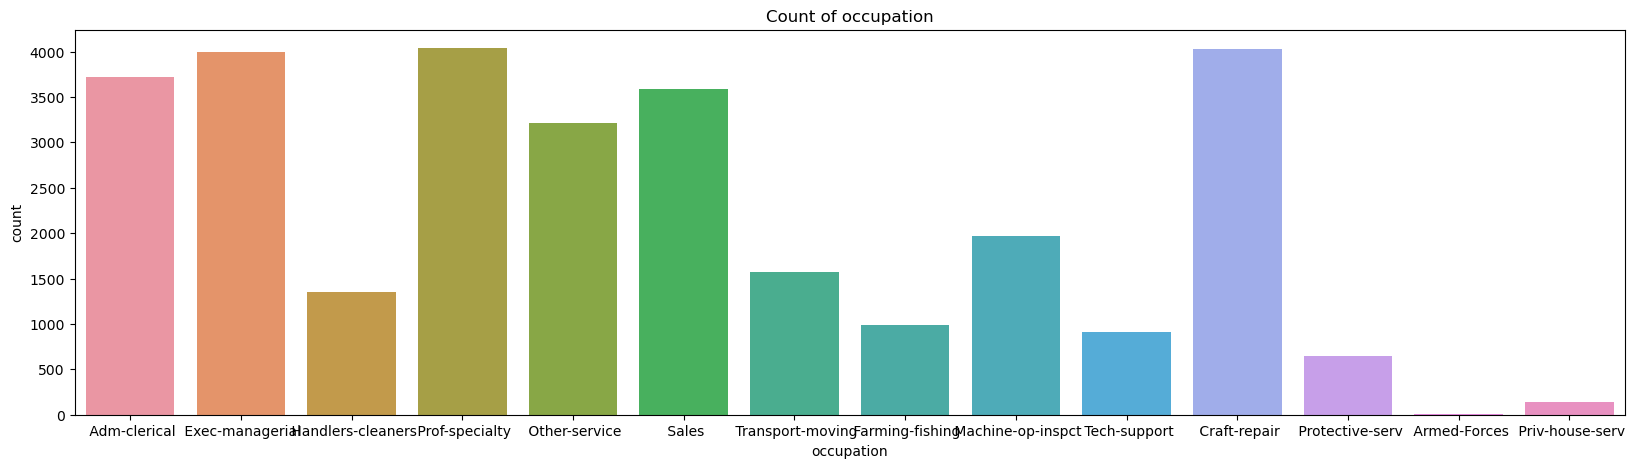

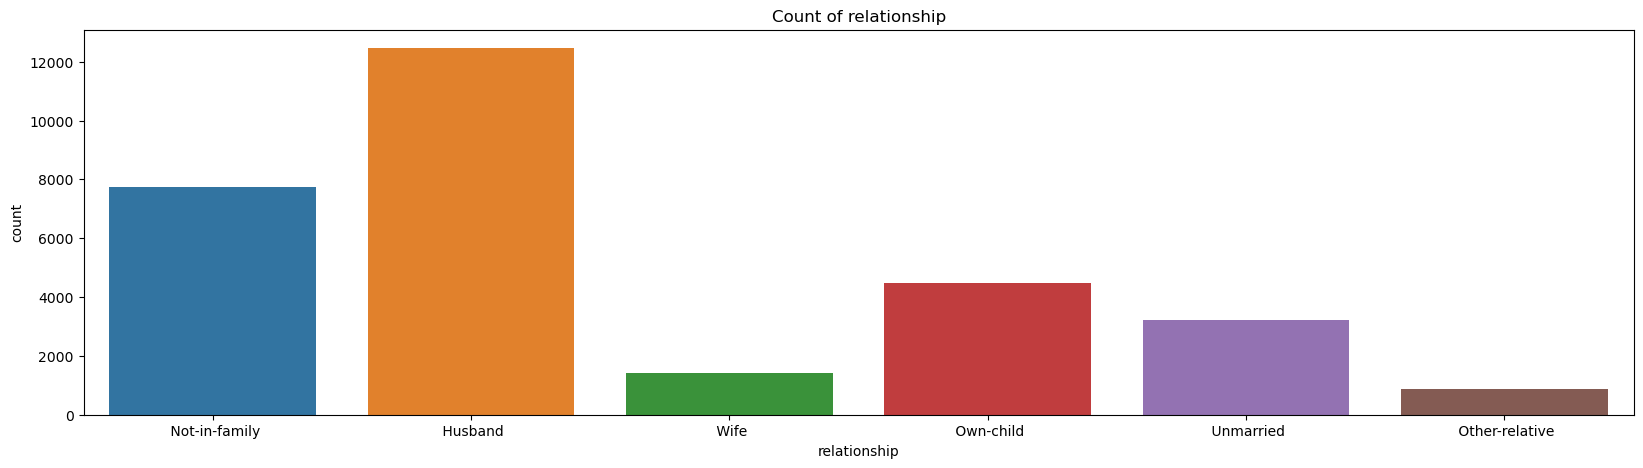

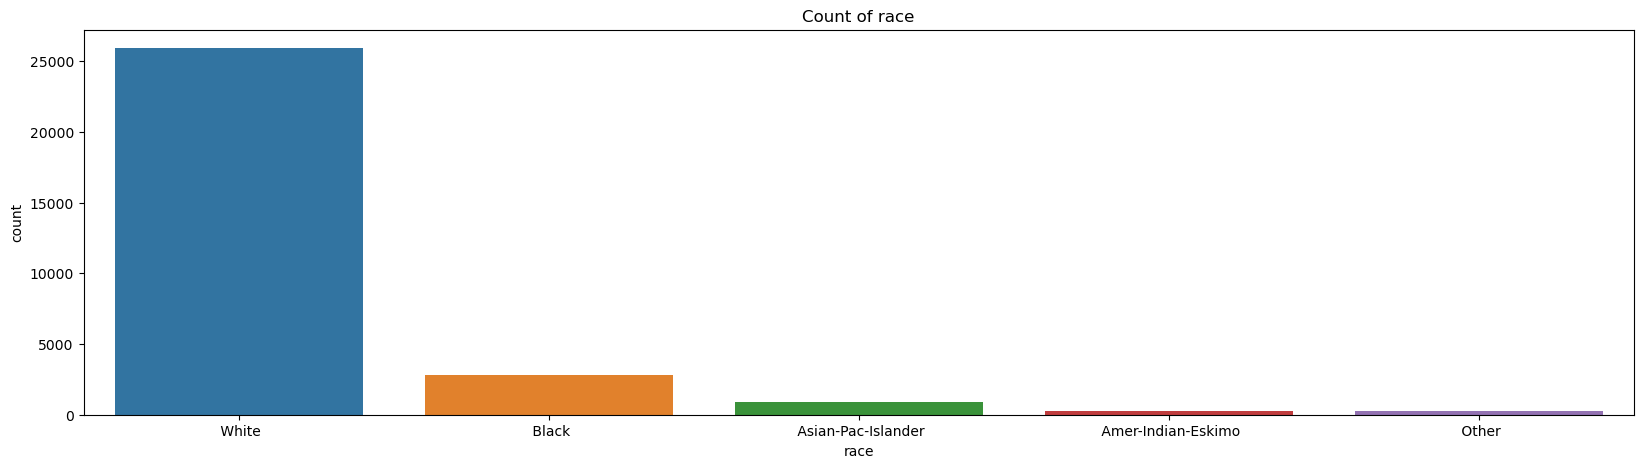

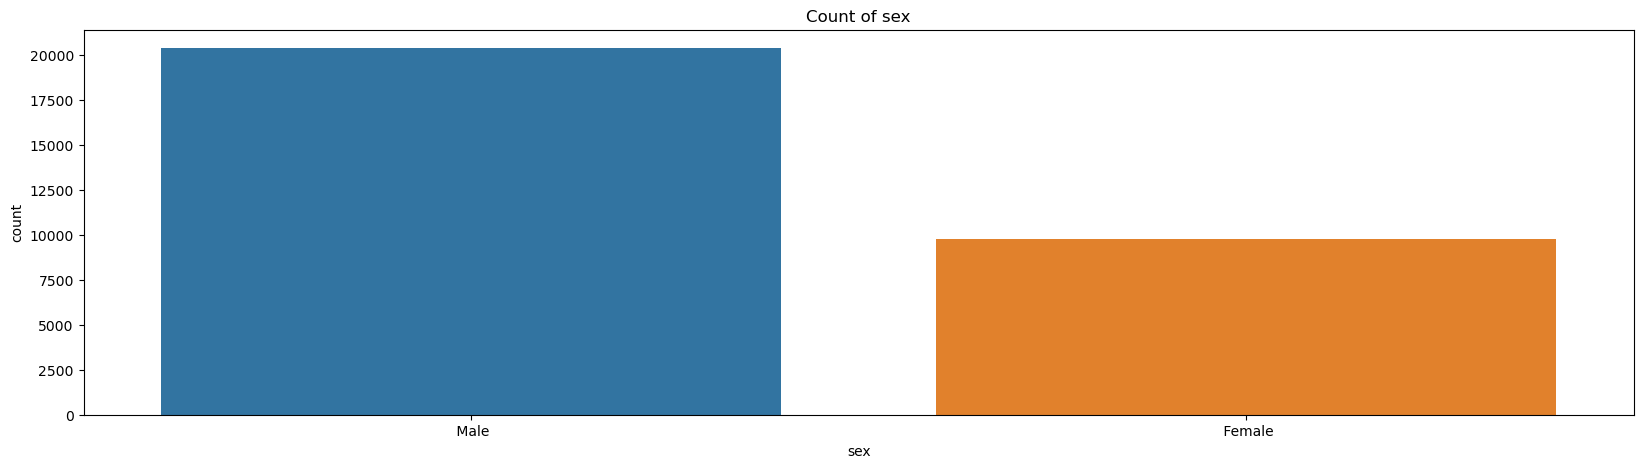

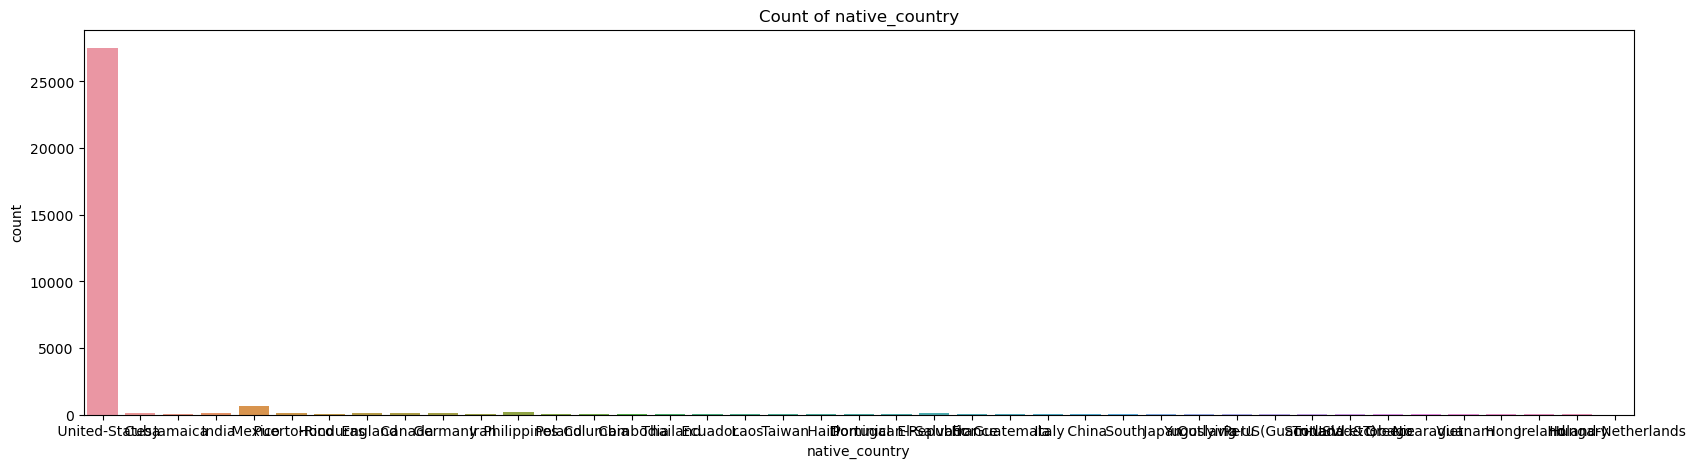

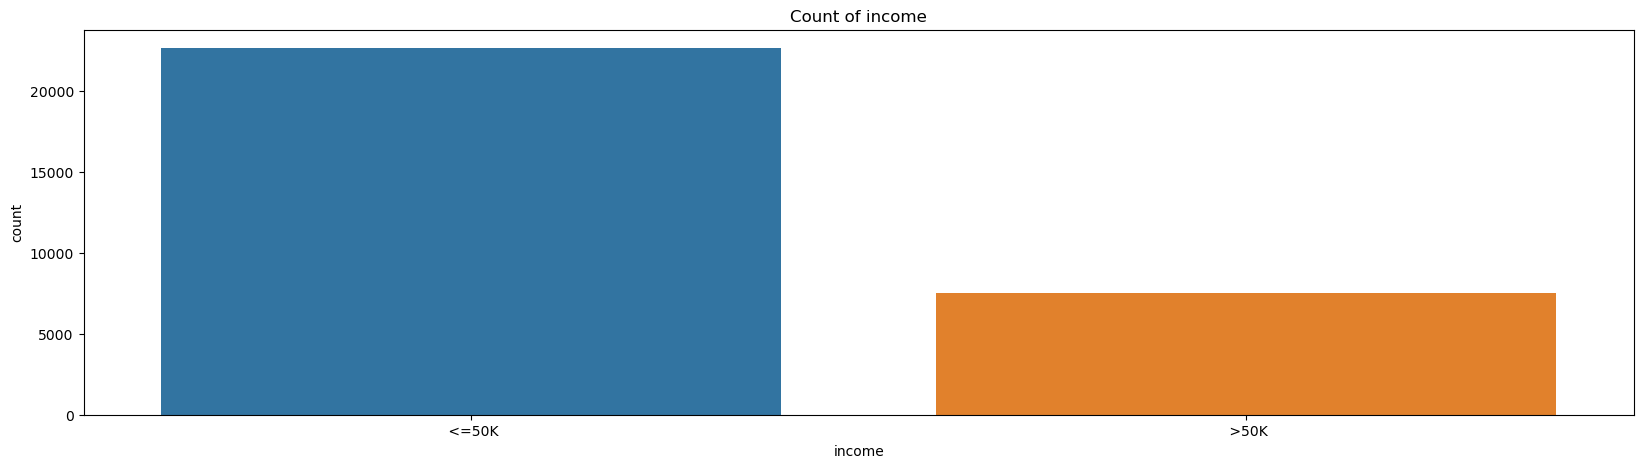

In [171]:
# Count plots for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(20, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.show()

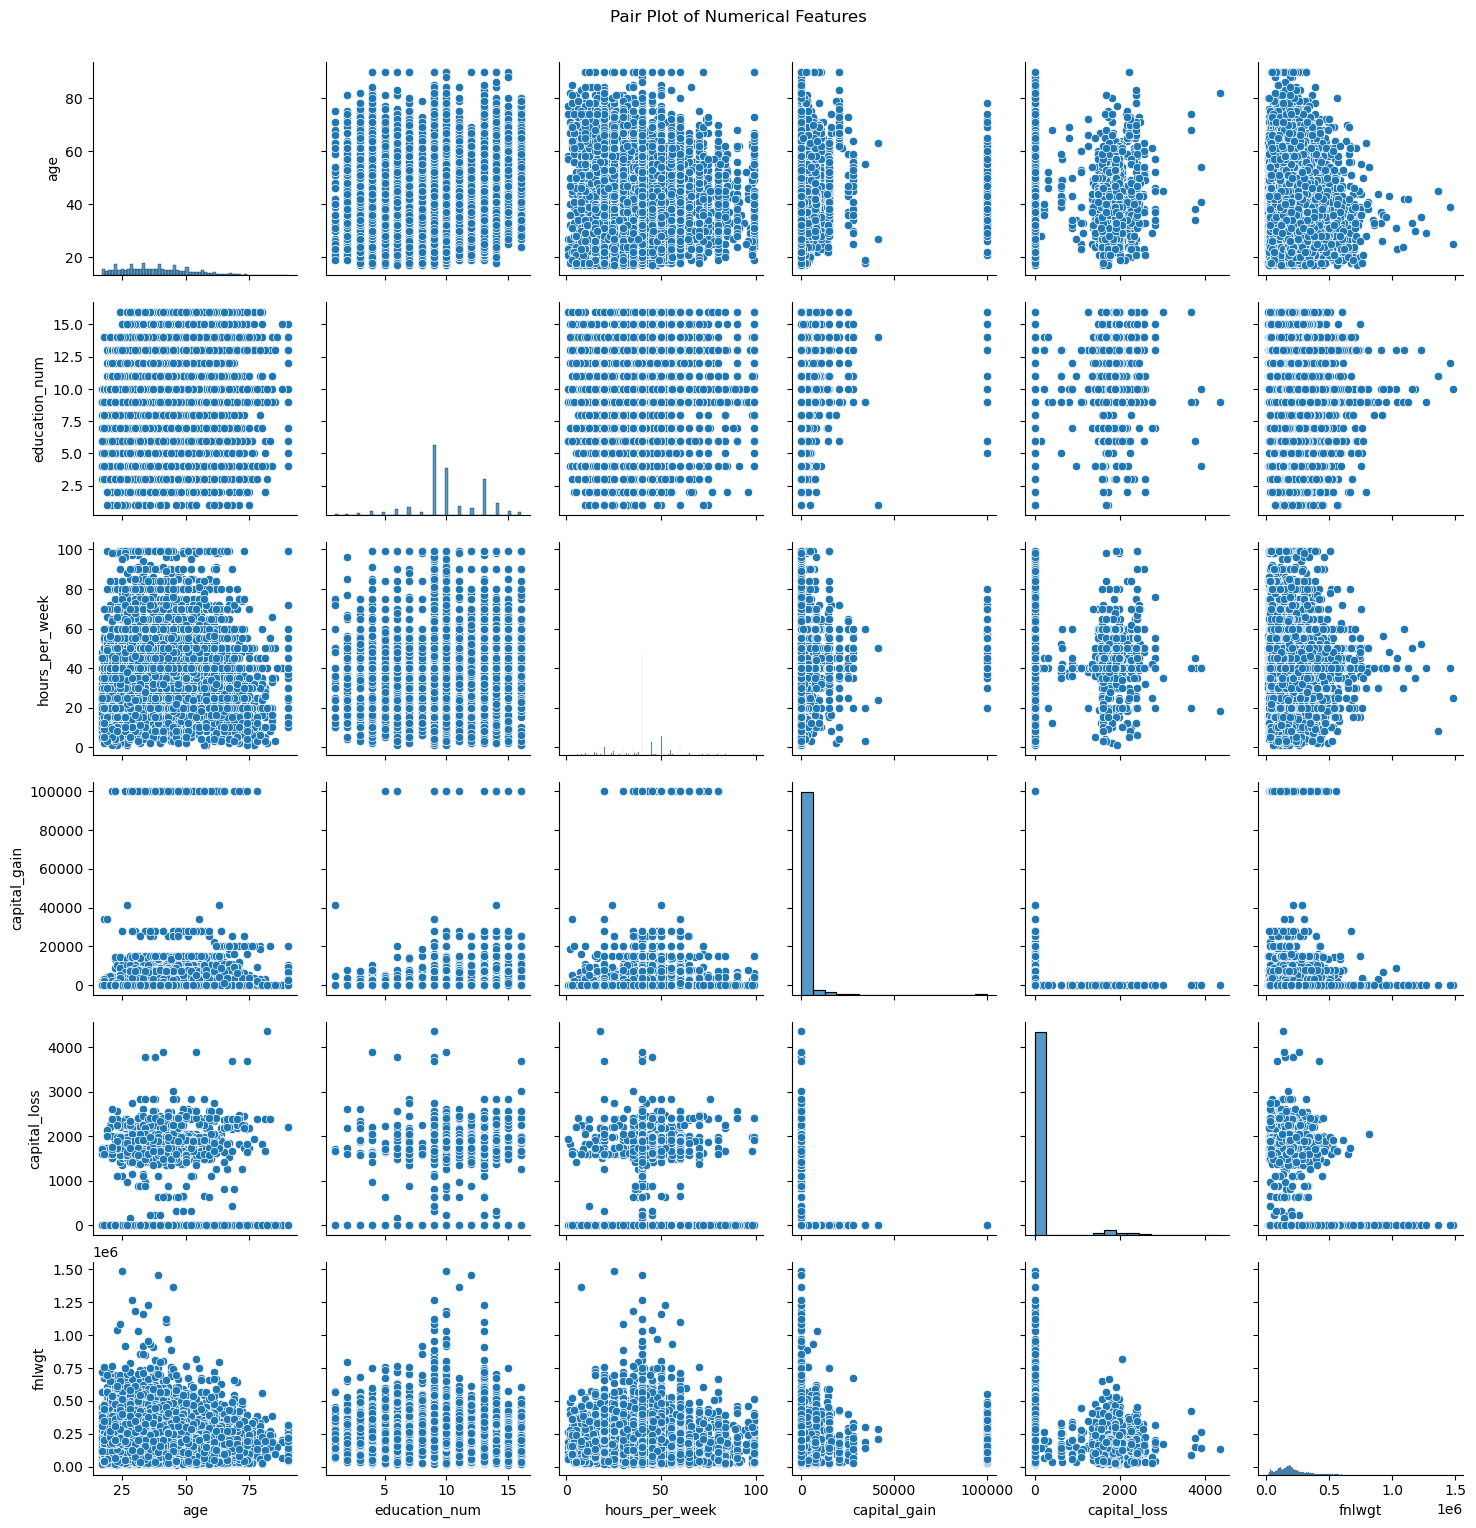

In [172]:
# Pair plot for numerical features
sns.pairplot(df[['age', 'education_num', 'hours_per_week', 'capital_gain', 'capital_loss', 'fnlwgt']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

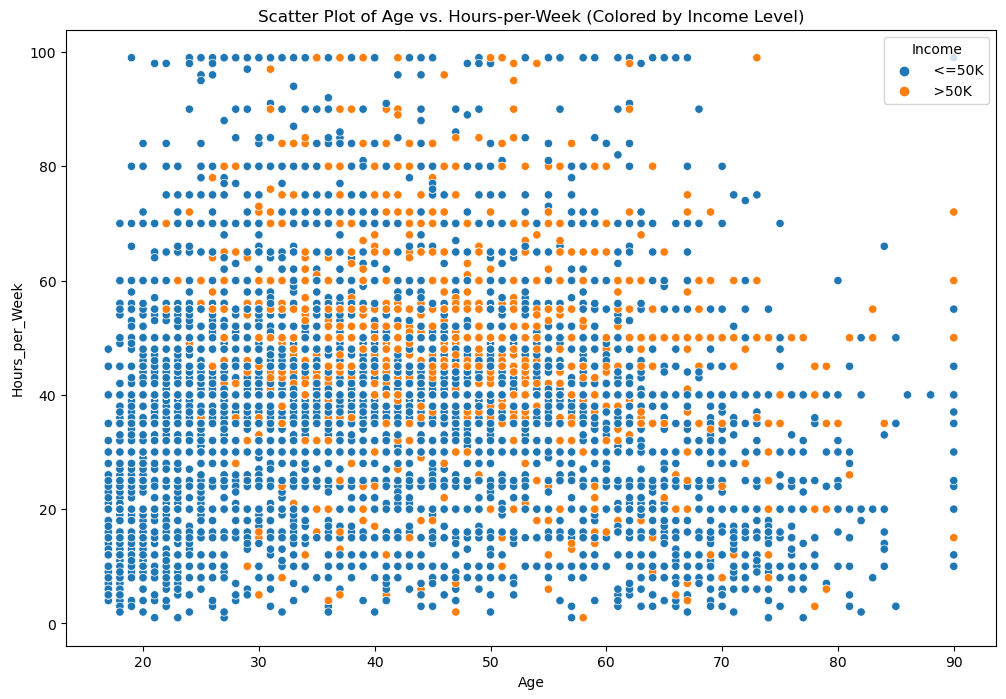

In [173]:
# Set the size of the figure for the scatter plot
plt.figure(figsize=(12, 8))
# Create a scatter plot for 'age' vs. 'hours_per_week', colored by 'income'
sns.scatterplot(x='age', y='hours_per_week', hue='income', data=df)

plt.title('Scatter Plot of Age vs. Hours-per-Week (Colored by Income Level)')
plt.xlabel('Age')
plt.ylabel('Hours_per_Week')
# Display the legend in the upper right with 'Income' as the title
plt.legend(title='Income', loc='upper right')
plt.show()


#### Income vs Hours per week

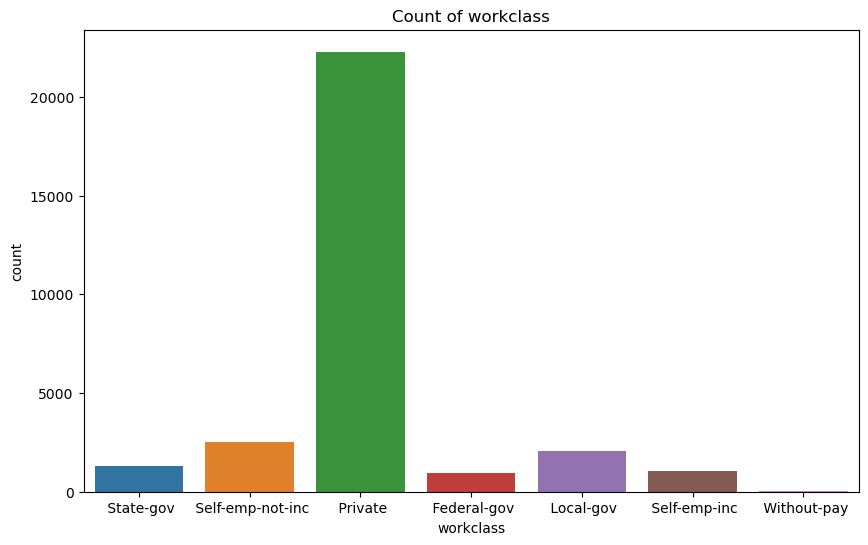

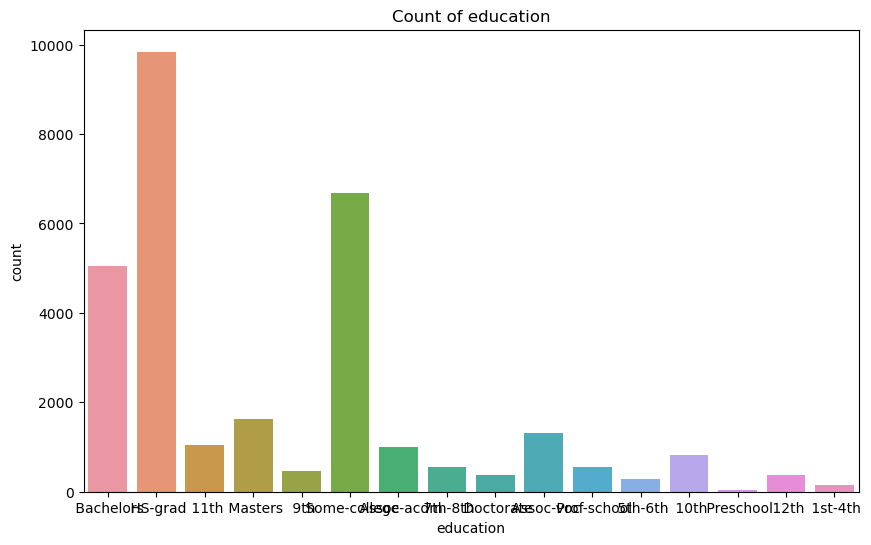

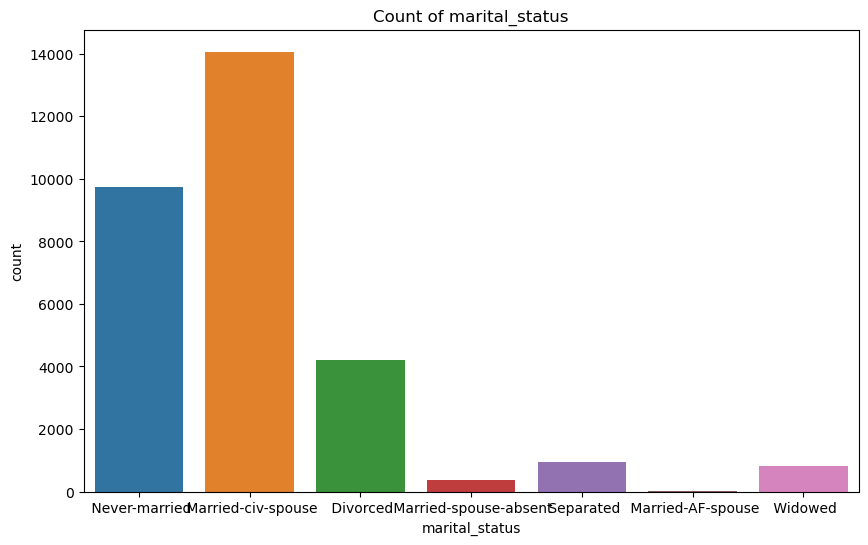

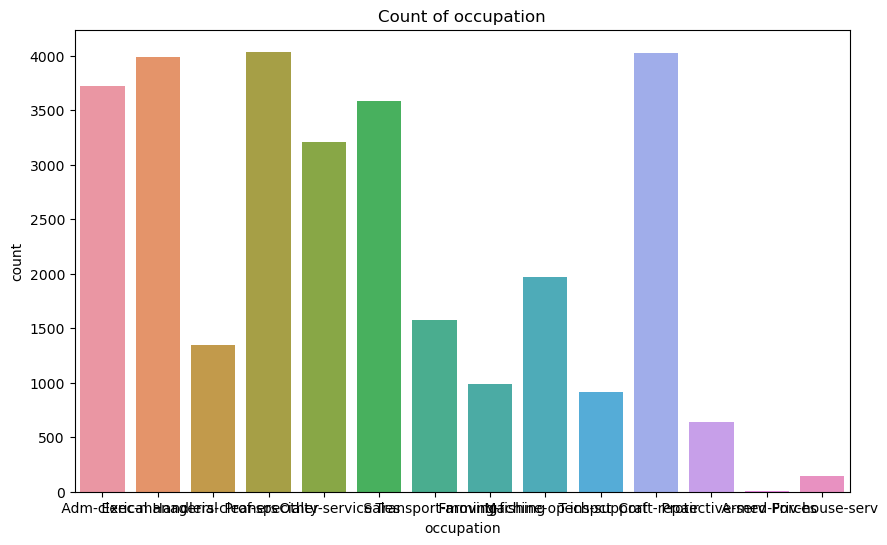

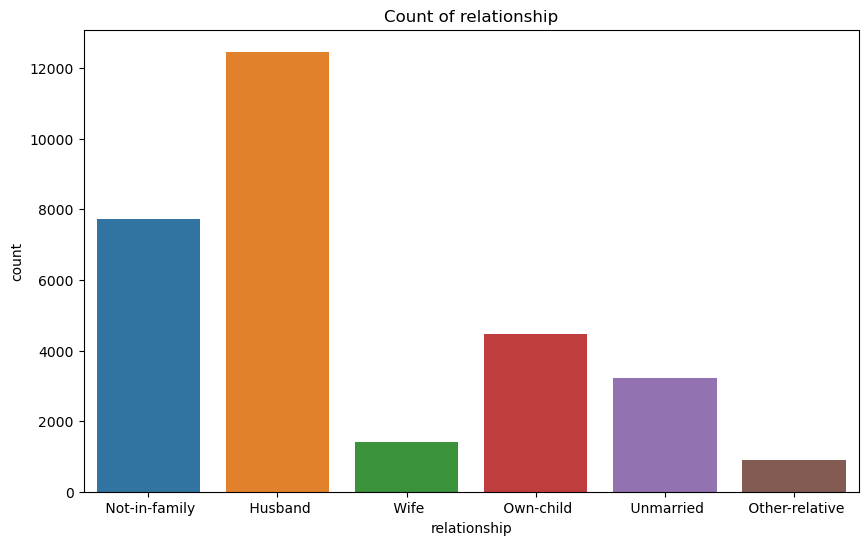

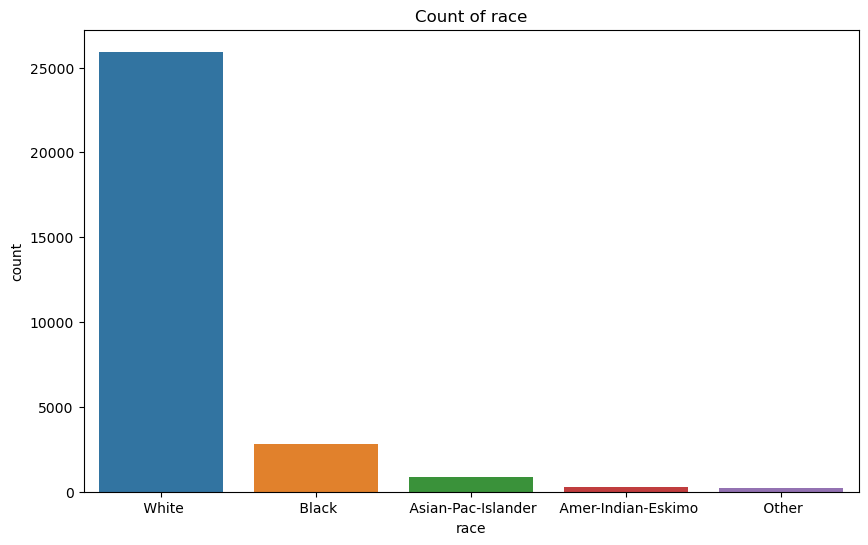

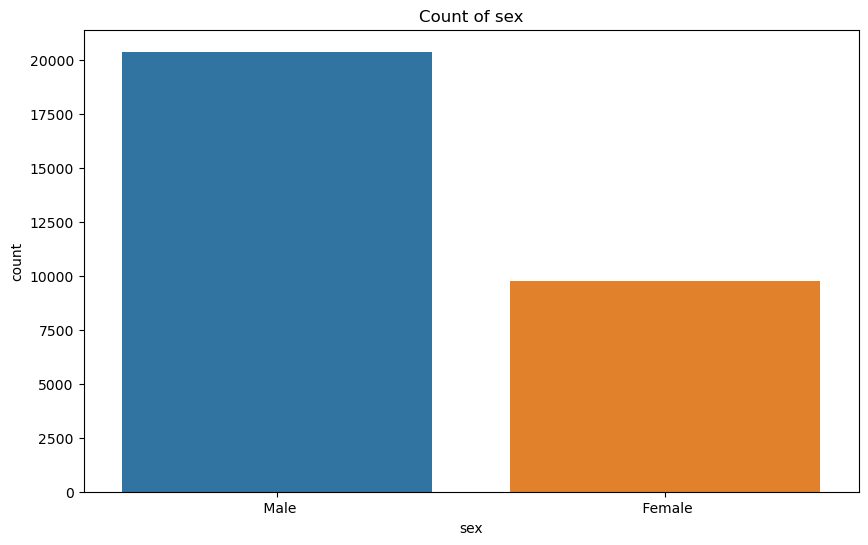

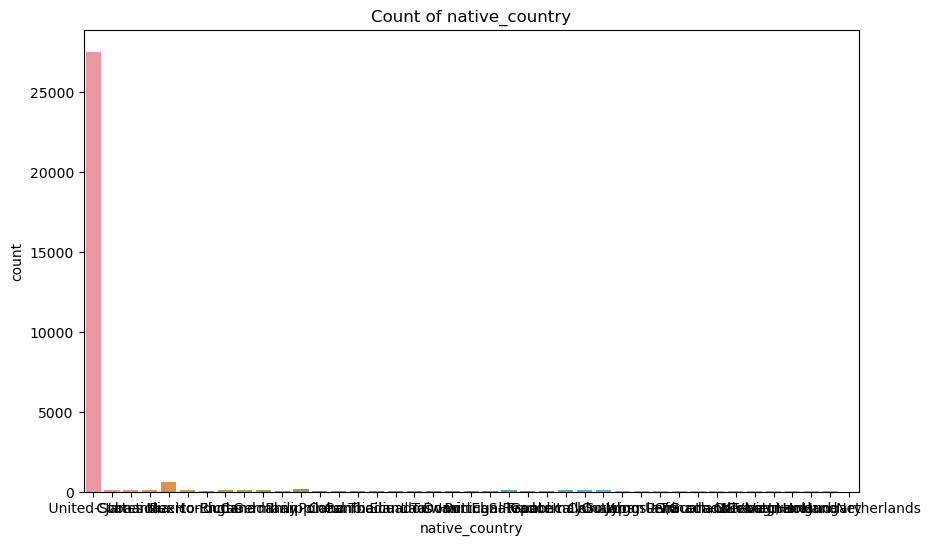

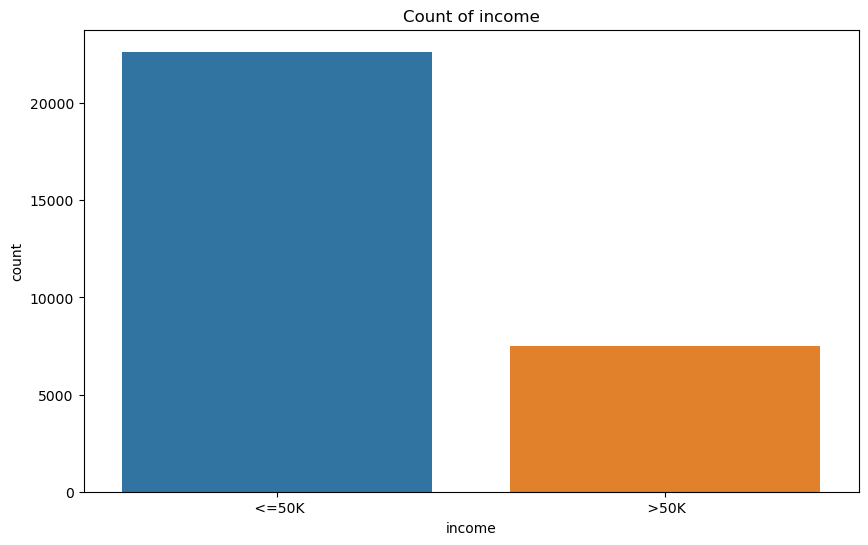

In [174]:
# Count plots for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.show()

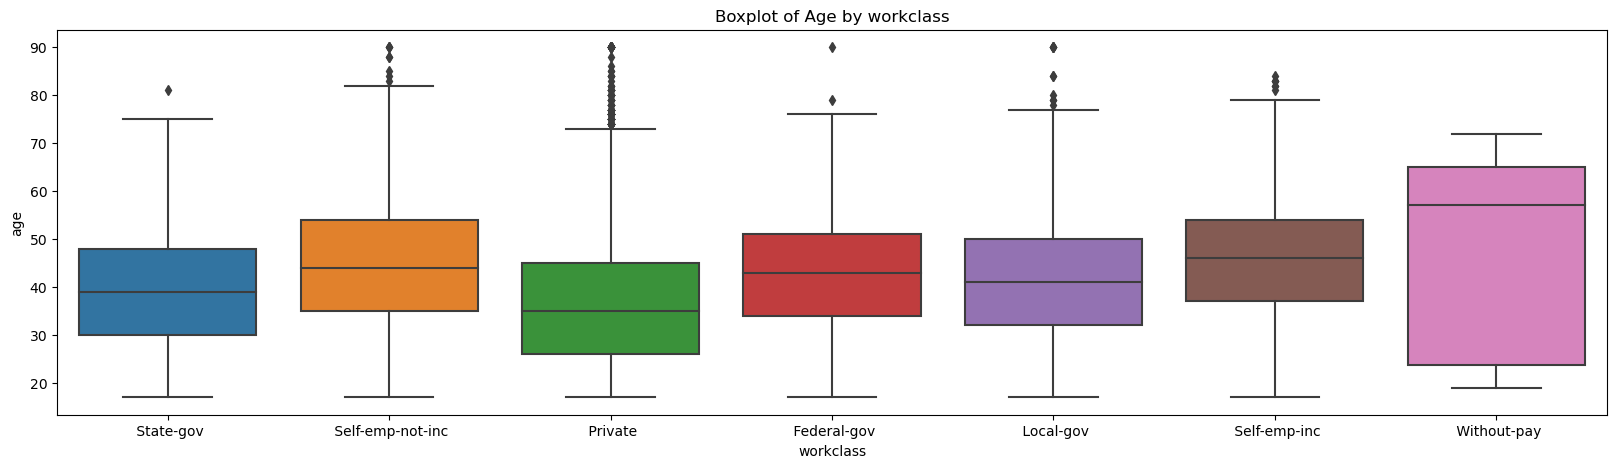

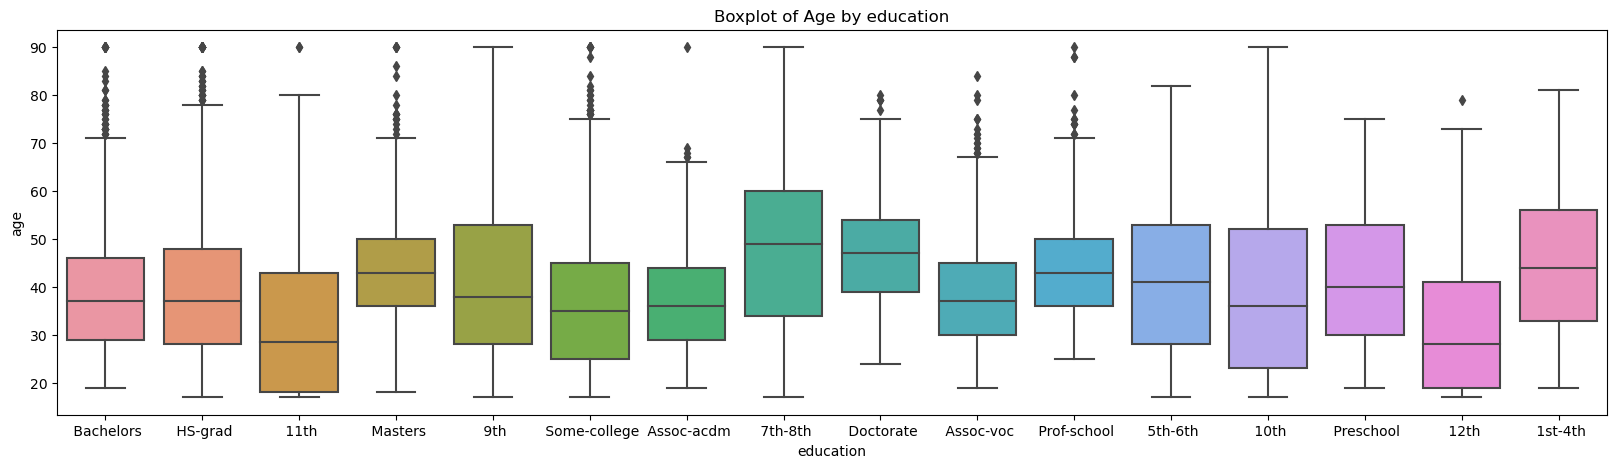

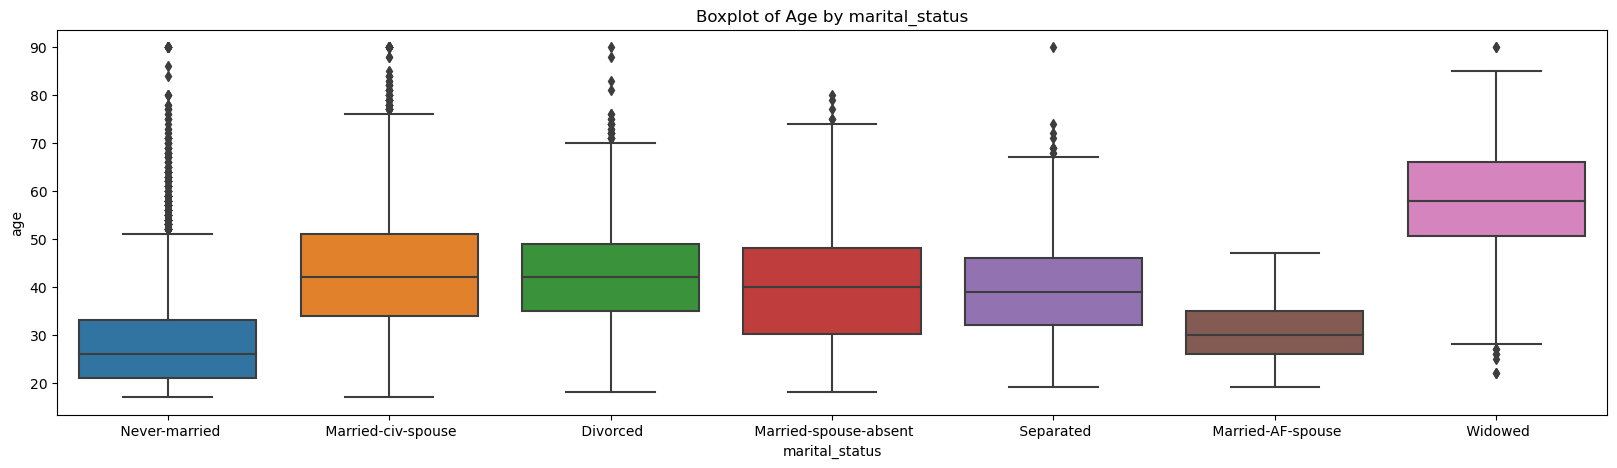

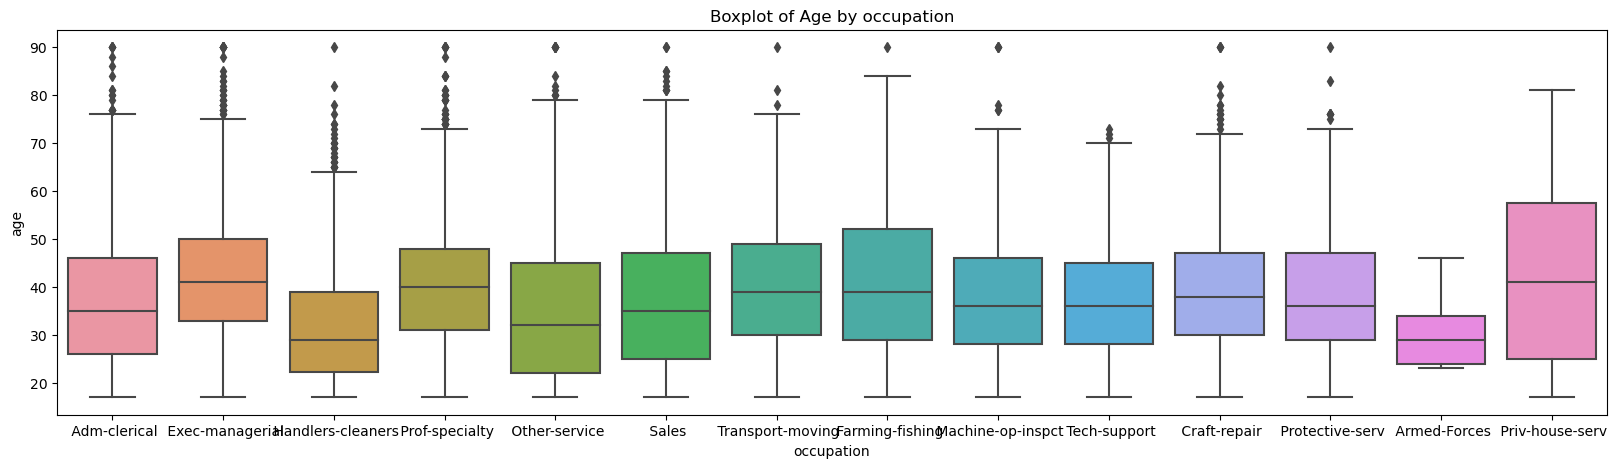

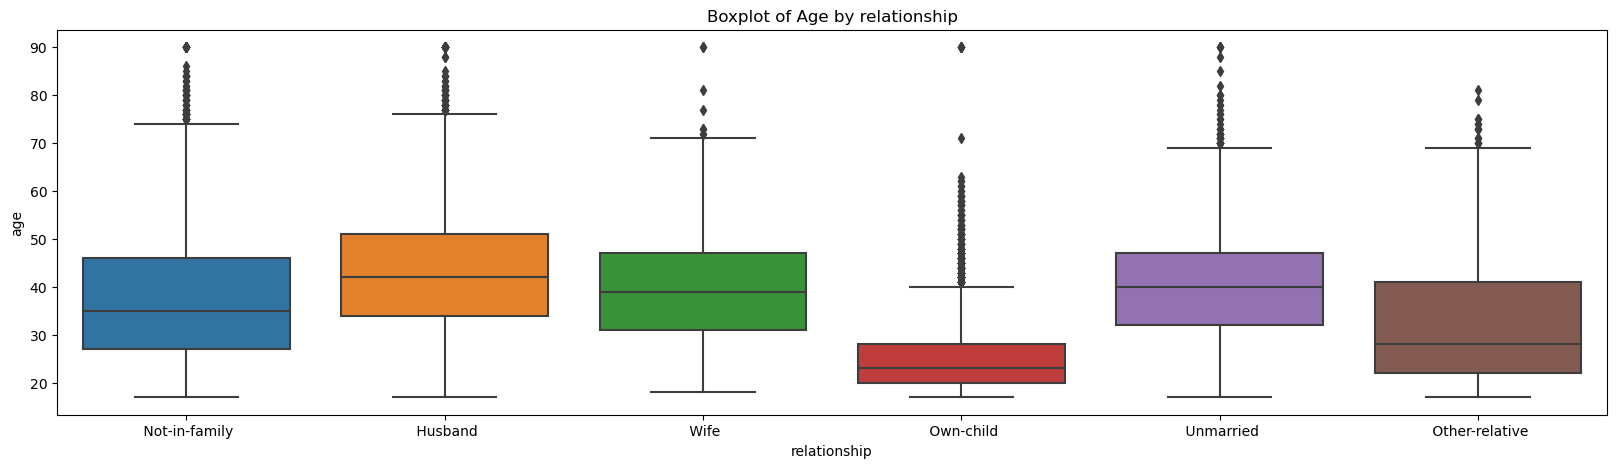

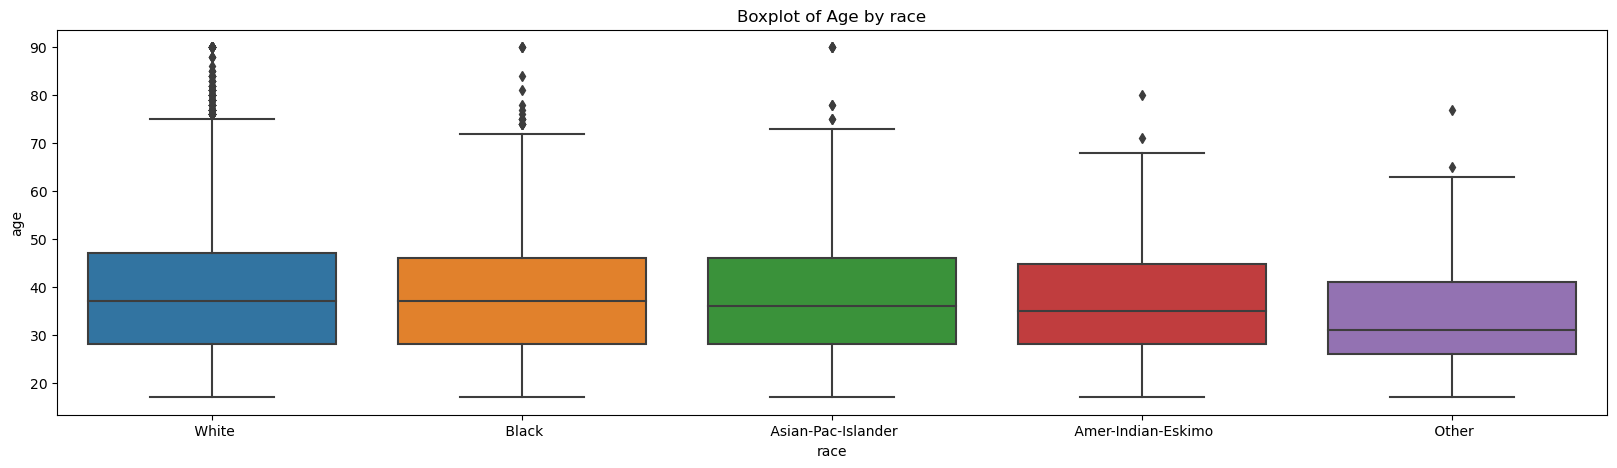

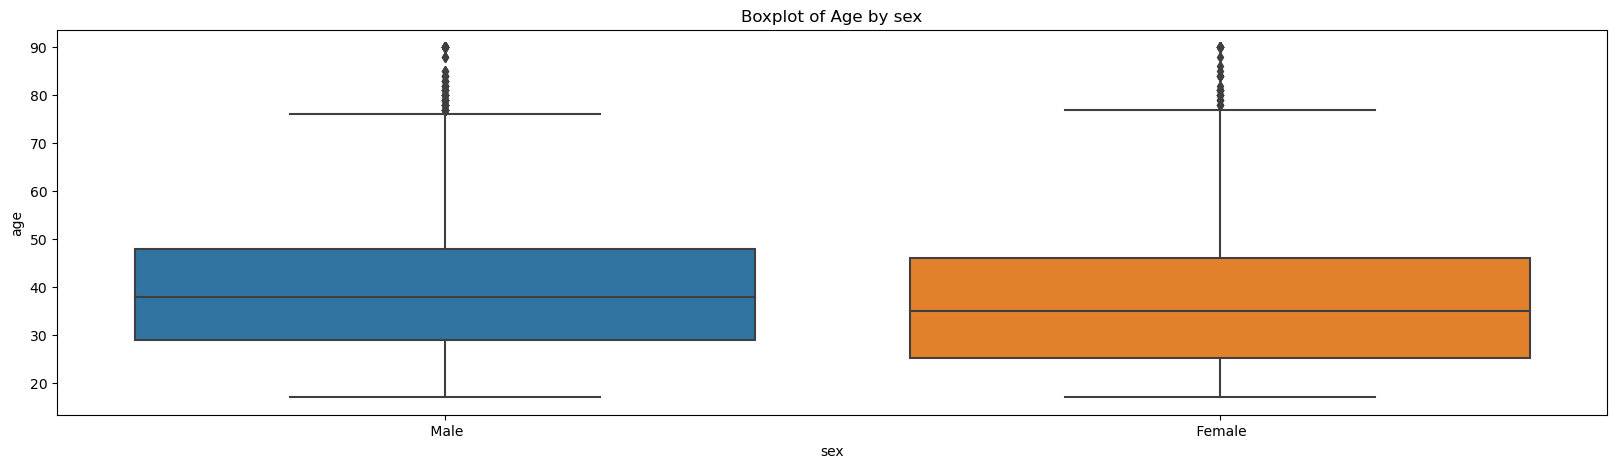

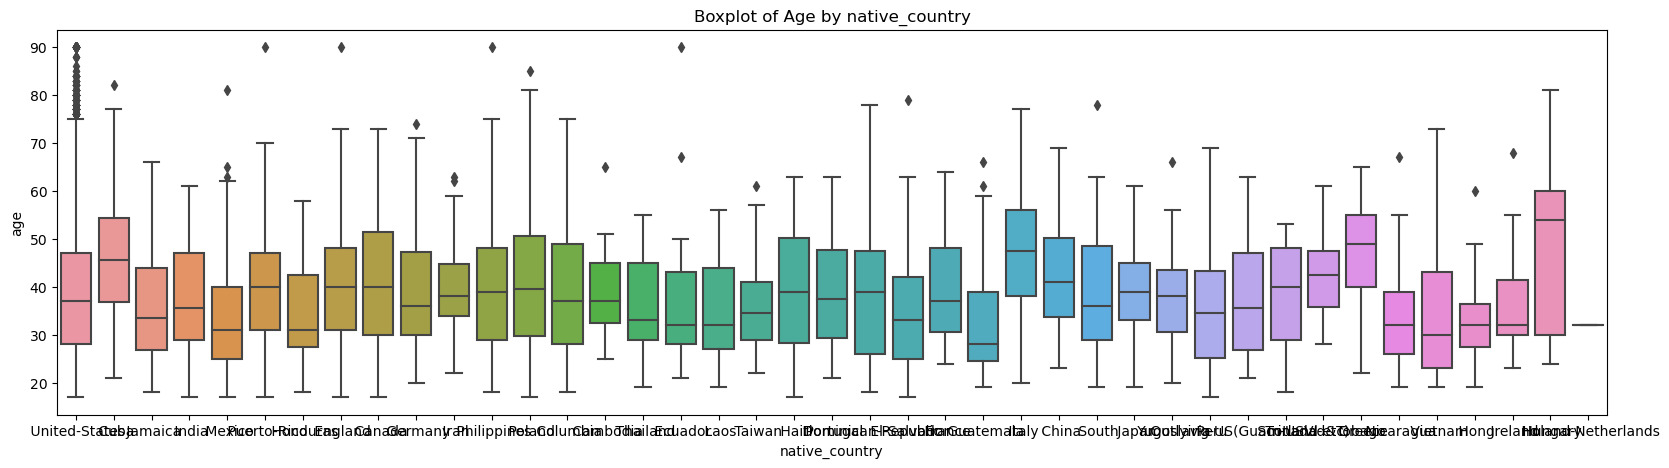

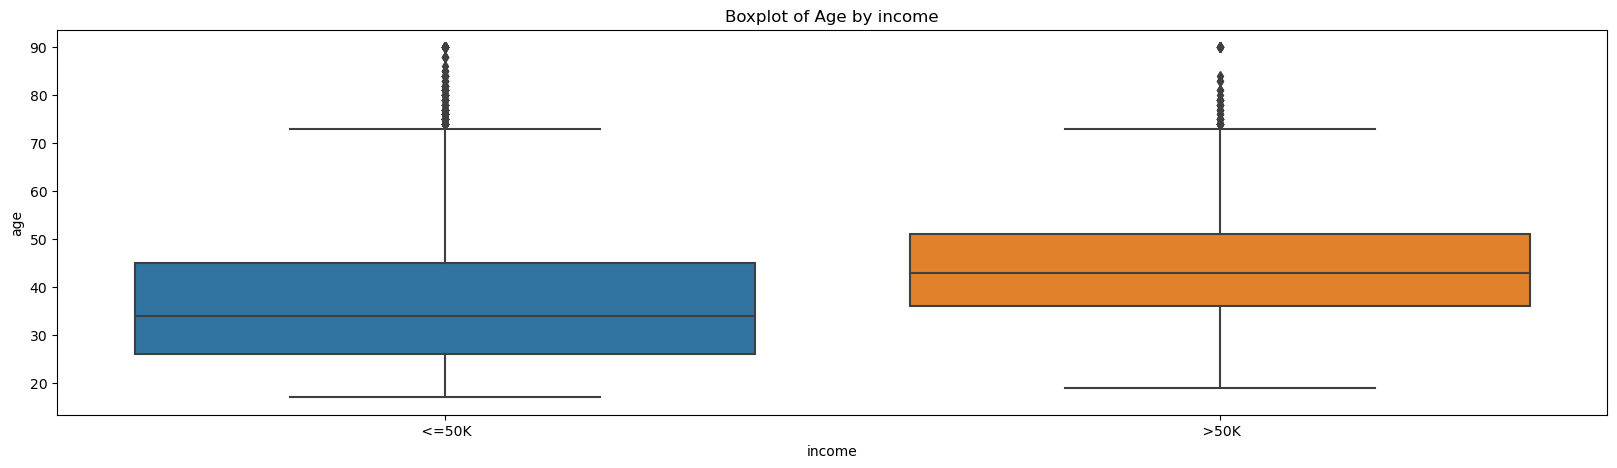

In [175]:
# Boxplot for categorical columns vs. numeric columns
for column in categorical_columns:
    plt.figure(figsize=(20, 5))
    sns.boxplot(data=df, x=column, y='age')
    plt.title(f'Boxplot of Age by {column}')
    plt.show()

#### Correlation Matrix

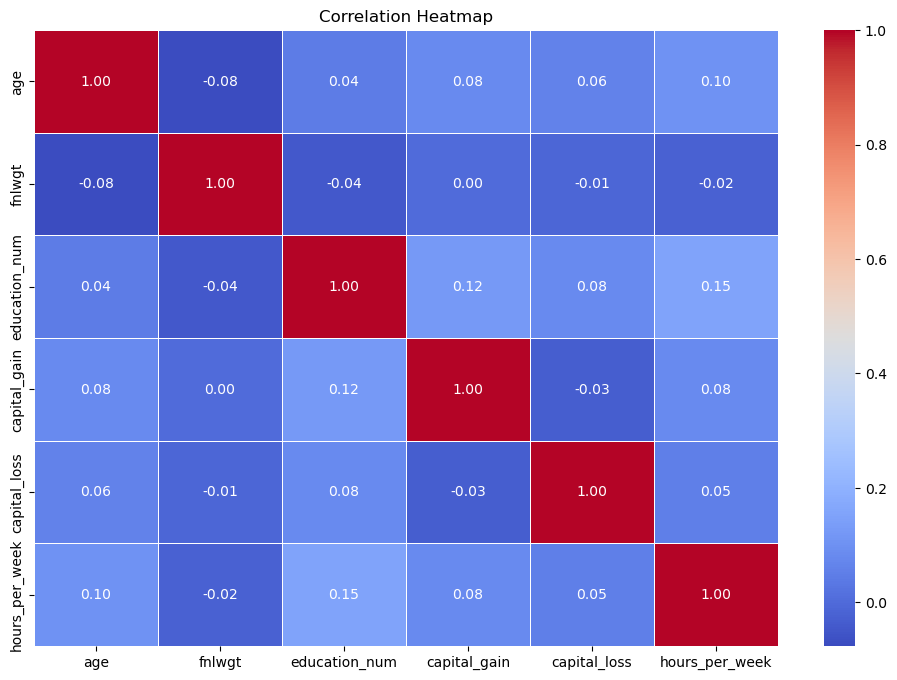

In [176]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
# Create a heatmap with annotations, using the 'coolwarm' color map and formatting values to two decimal places
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Data Splitting and Preprocessing

In [177]:


# Assuming 'income' is the target variable
X = df.drop(['income'], axis=1)

# Convert the target variable to numerical values
y = np.where(df['income']==' <=50K',0,1).reshape(-1)

# One-hot encode categorical columns
X = pd.get_dummies(X)
columns=list(X.columns)[:90]




Explained variance ratio: (0.9519060854805581+0j)


/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


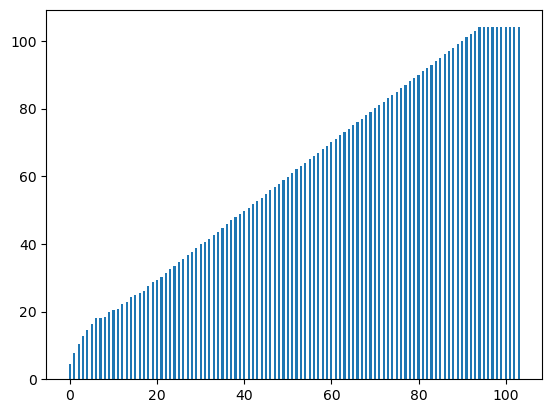

array([[ 0.51821068+0.j,  2.44239648+0.j,  0.59109703+0.j, ...,
        -0.4011028 +0.j,  0.32538723+0.j, -0.4421365 +0.j],
       [-2.84879264+0.j,  1.42727303+0.j,  0.0632561 +0.j, ...,
         1.03830454+0.j,  1.35312398+0.j, -0.12224899+0.j],
       [ 0.80097833+0.j, -0.87338866+0.j,  1.20573024+0.j, ...,
         0.05964325+0.j, -0.28974481+0.j, -0.48282364+0.j],
       ...,
       [ 2.36158276+0.j,  0.85860917+0.j, -0.30270404+0.j, ...,
         0.57082553+0.j, -0.31712288+0.j, -0.3332339 +0.j],
       [ 1.9797012 +0.j, -1.1805689 +0.j,  1.83205078+0.j, ...,
         0.49360755+0.j, -0.04132791+0.j, -0.22015827+0.j],
       [-0.74518025+0.j,  1.717621  +0.j, -0.56118951+0.j, ...,
         0.56669104+0.j,  0.51916899+0.j,  0.22159945+0.j]])

In [178]:
class PCA:
    def __init__(self, n):
        # Initialize the PCA object with the number of components (n)
        self.n = n
        self.components = None
 
    def fit(self, X):
        # Fit the PCA model to the input data (X)
        # Calculate the covariance matrix
        cov = np.cov(X, rowvar=False)
        eigen_values, eigen_vectors = np.linalg.eig(cov)
        # Compute eigenvalues and eigenvectors
        eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
        eigen_pairs.sort(key=lambda x: x[0], reverse=True)
 
        self.components = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:self.n]])
         # Calculate explained variance ratio
        explained_variance_ratio = eigen_values[:self.n].sum() / eigen_values.sum()
        cumulative_data = np.cumsum(eigen_values)
        print("Explained variance ratio:", explained_variance_ratio)
 
        plt.bar(range(X.shape[1]), cumulative_data, width=0.5)
        plt.show()
        
         # Transform the input data using the selected components
    def transform(self, X):
        return np.dot(X, self.components.T)

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
 
model_PCA = PCA(n=90)
model_PCA.fit(X_scaled)
X = model_PCA.transform(X_scaled)

X

In [179]:
X=pd.DataFrame(X,columns=columns)

In [180]:
X

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua
0,0.518211+0.000000j,2.442396+0.000000j,0.591097+0.000000j,1.419615+0.000000j,0.329773+0.000000j,1.886072+0.000000j,-0.056484+0.000000j,-0.668052+0.000000j,0.647209+0.000000j,1.308481+0.000000j,...,1.043925+0.000000j,0.404989+0.000000j,-0.808554+0.000000j,-0.782030+0.000000j,-0.522615+0.000000j,-1.242298+0.000000j,-0.036652+0.000000j,-0.401103+0.000000j,0.325387+0.000000j,-0.442137+0.000000j
1,-2.848793+0.000000j,1.427273+0.000000j,0.063256+0.000000j,0.034886+0.000000j,0.129270+0.000000j,0.424847+0.000000j,0.968925+0.000000j,-1.110150+0.000000j,1.010504+0.000000j,-1.594196+0.000000j,...,-0.625197+0.000000j,-1.625257+0.000000j,-0.979060+0.000000j,-1.563181+0.000000j,0.679245+0.000000j,0.585288+0.000000j,0.956981+0.000000j,1.038305+0.000000j,1.353124+0.000000j,-0.122249+0.000000j
2,0.800978+0.000000j,-0.873389+0.000000j,1.205730+0.000000j,-0.502657+0.000000j,0.457480+0.000000j,0.680879+0.000000j,-2.665488+0.000000j,-0.059993+0.000000j,-0.881951+0.000000j,1.006403+0.000000j,...,-0.335532+0.000000j,-0.200045+0.000000j,0.145834+0.000000j,-0.686484+0.000000j,0.181388+0.000000j,0.047443+0.000000j,-0.624793+0.000000j,0.059643+0.000000j,-0.289745+0.000000j,-0.482824+0.000000j
3,-0.712682+0.000000j,-2.544531+0.000000j,-0.760717+0.000000j,-0.146256+0.000000j,-3.036790+0.000000j,0.263812+0.000000j,0.144154+0.000000j,2.359760+0.000000j,-0.482797+0.000000j,-1.144328+0.000000j,...,0.645187+0.000000j,1.445519+0.000000j,-0.283020+0.000000j,-0.024918+0.000000j,-0.427305+0.000000j,-0.868318+0.000000j,0.525228+0.000000j,0.307941+0.000000j,-0.063885+0.000000j,-0.289954+0.000000j
4,1.113507+0.000000j,1.475848+0.000000j,-4.615605+0.000000j,0.323462+0.000000j,0.700442+0.000000j,-2.268233+0.000000j,2.488115+0.000000j,3.405888+0.000000j,0.177266+0.000000j,-0.965844+0.000000j,...,0.749005+0.000000j,2.345310+0.000000j,-1.965827+0.000000j,1.752626+0.000000j,-1.374267+0.000000j,0.214170+0.000000j,-1.152256+0.000000j,0.063466+0.000000j,0.120447+0.000000j,-0.825883+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.778658+0.000000j,1.556566+0.000000j,0.009939+0.000000j,-0.545224+0.000000j,0.339534+0.000000j,-3.423918+0.000000j,2.321769+0.000000j,0.558734+0.000000j,0.545306+0.000000j,1.140126+0.000000j,...,0.225123+0.000000j,0.799280+0.000000j,0.121760+0.000000j,0.640010+0.000000j,-0.139081+0.000000j,0.333009+0.000000j,-0.139773+0.000000j,0.273083+0.000000j,-0.138024+0.000000j,-0.286606+0.000000j
30158,-1.709274+0.000000j,-1.755265+0.000000j,0.622946+0.000000j,-0.713064+0.000000j,-0.422301+0.000000j,-1.261577+0.000000j,-0.503941+0.000000j,0.359281+0.000000j,-1.322595+0.000000j,0.575081+0.000000j,...,-0.405238+0.000000j,-0.230453+0.000000j,-0.236558+0.000000j,-0.555312+0.000000j,0.246908+0.000000j,-0.372445+0.000000j,-0.377561+0.000000j,-0.073355+0.000000j,0.198122+0.000000j,0.001960+0.000000j
30159,2.361583+0.000000j,0.858609+0.000000j,-0.302704+0.000000j,-4.089668+0.000000j,0.268624+0.000000j,-1.257399+0.000000j,-0.255361+0.000000j,-1.112020+0.000000j,-0.824703+0.000000j,0.021962+0.000000j,...,1.535301+0.000000j,0.041937+0.000000j,0.386278+0.000000j,1.126415+0.000000j,-0.128557+0.000000j,-0.839855+0.000000j,-0.037217+0.000000j,0.570826+0.000000j,-0.317123+0.000000j,-0.333234+0.000000j
30160,1.979701+0.000000j,-1.180569+0.000000j,1.832051+0.000000j,1.597305+0.000000j,-0.643085+0.000000j,-0.210419+0.000000j,0.788122+0.000000j,-0.809502+0.000000j,-0.608762+0.000000j,1.004725+0.000000j,...,0.417861+0.000000j,-0.303082+0.000000j,0.089924+0.000000j,-1.372015+0.000000j,0.474361+0.000000j,0.605348+0.000000j,0.861337+0.000000j,0.4936

In [181]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

@dataclass
class LogisticRegression:


    def __init__(self,X,y,Learning_Rate,max_iterations,epsilon):
        # Initialize Logistic Regression with hyperparameters
        self.Learning_Rate=Learning_Rate
        self.max_iterations=max_iterations
        self.epsilon=epsilon
        self.X=X.values.astype(float)
        self.y=y
        self.X_train,self.X_test,self.y_train,self.y_test=self.split_data()
    def split_data(self, test_size=0.3):
        X_train, X_rem, y_train, y_remainder = train_test_split(self.X, self.y, test_size=test_size,shuffle=True)
        return X_train, X_rem, y_train, y_remainder

    def Normalize_data(self,X):
        mean=np.mean(X,axis=0)
        std=np.std(X,axis=0)
        X=(X-mean)/std
        X=self.addX0(X)
        return X,mean,std

    def normalize_test(self,X,mean,std):
        X=(X-mean)/std
        X=self.addX0(X)
        return X


    def addX0(self, X): # Add ones to cater the intercept
        return np.column_stack([np.ones(X.shape[0]), X])


    def sigmoid(self, z): # This will give sigmoid function value
        sig = 1 / (1 + np.exp(-z))
        return sig



    def costFunction(self, X, y):# Loss function minimization
        sig = self.sigmoid(X.dot(self.w))
        loss = y * np.log(sig) + (1 - y) * np.log(1 - sig)
        cost = - loss.sum()
        return cost

    def gradient(self, X, y): # Loss function for gradient descent

        sig = self.sigmoid(X.dot(self.w))
        return (sig - y).dot(X)

    def gradientDescent(self, X, y):
        errors = []
        prev_error = float('inf')
        for i in tqdm(range(self.max_iterations), colour='red'):
            self.w = self.w - self.Learning_Rate * self.gradient(X, y)
            current_error = self.costFunction(X, y)
            errors.append(current_error)

            if np.abs(prev_error - current_error) < self.epsilon:
                break
            prev_error = current_error
        self.plot_cost(errors)

    def predict(self,X): # It will compute the probability value for a given
                           # point and output 0 or 1 depending on whether the probability is greater or less than 0.5.
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)



    def fit(self):

        self.w = 0.0001* np.ones(self.X_train.shape[1]+1, dtype=np.float64)
        self.X_train,mean,std=self.Normalize_data(self.X_train)

        self.X_test=self.normalize_test(self.X_test,mean,std)
        self.gradientDescent(self.X_train, self.y_train)

        self.y_hat_train = self.predict(self.X_train)


    def plot_cost(self, cost_sequence):

        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel='cost', title='Cost Trend')
        ax.grid()
        plt.show()

    def plot(self):

        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 1], self.X_train[:, 2],
                     self.sigmoid(self.X_train.dot(self.w)),
                     c=self.y_train[:], cmap='viridis', s=100)

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15)
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation=0)
        plt.show()


    def scatterPlt(self):

        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w[1:]).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14, 12))

        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)

        ax.scatter(self.X_train[:, 1], self.X_train[:, 2],
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        plt.show()

    def plot3D(self):

        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))

        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w[1:]).reshape(xx.shape)
        fig = plt.figure(figsize=(14, 12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 1], self.X_train[:, 2],
                     c=self.y_train[:], s=50,
                     cmap="RdBu", vmin=-.2, vmax=1.2,
                     edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3')


/var/folders/wt/9wwp93rs14g2x6nhzl_ycw880000gn/T/ipykernel_25224/4224724666.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  self.X=X.values.astype(float)
 25%|█████████▎                           | 2511/10000 [00:09<00:28, 264.06it/s]


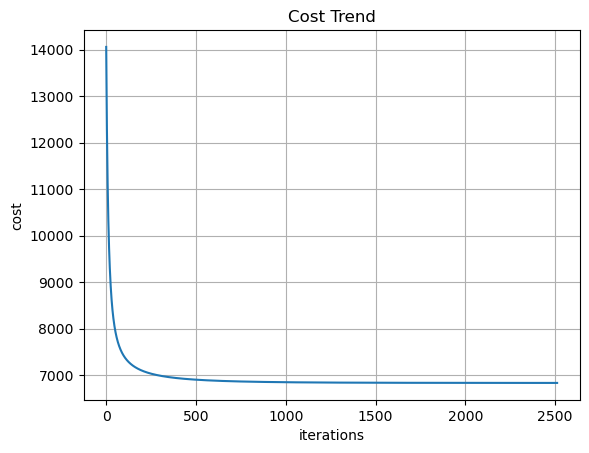

In [182]:
# Training model on basis of training data

lr = LogisticRegression(X=X,y=y,epsilon=0.001, Learning_Rate = 0.00001, max_iterations = 10000)
lr.fit()


In [183]:
lr.predict(lr.X_train)

array([0., 1., 1., ..., 0., 0., 0.])

In [184]:
# def accuracy(y, y_hat):
#         count=0
#         for i,value in enumerate(y):
#             if y[i]==y_hat[i]:
#                 count=count+1
#         return count/len(y)*100
train_start_time = datetime.now()
def accuracy_train(y_train,y_preds):
        train_end_time = datetime.now()
        print('y_preds: ', y_preds)
        print('y_preds shape: ', y_preds.shape)
        count0 = 0
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        count5 = 0
        count6 = 0
        count7 = 0
        count8 = 0
        count9 = 0
        count10 = 0
        total_correct = 0
        for i in range(len(y_train)):
                if int(y_train[i]) == int(y_preds[i]):
                    total_correct += 1
                else:
                    if y_train[i] == 0:
                        count0+=1
                    elif y_train[i] == 1:
                        count1+=1
                    elif y_train[i] ==2:
                        count2+=1
                    elif y_train[i] ==3:
                        count3+=1
                    elif y_train[i] ==4:
                        count4+=1
                    elif y_train[i] ==5:
                        count5+=1
                    elif y_train[i] ==6:
                        count6+=1
                    elif y_train[i] ==7:
                        count7+=1
                    elif y_train[i] ==8:
                        count8+=1
                    elif y_train[i] ==9:
                        count9+=1
                    else:
                        count10+=1
        train_time = train_end_time - train_start_time
        total_wrong = count0+count1+count2+count3+count4+count5+count6+count7+count8+count9+count10
        rate = total_wrong/(total_correct+total_wrong)
        print('misclassification rate',rate)
        print(classification_report(y_train, y_preds))
        print('Train_Time: ', train_time)
        return rate

In [185]:
accuracy_train(lr.y_test,lr.predict(lr.X_test))

y_preds:  [1. 0. 1. ... 0. 1. 0.]
y_preds shape:  (9049,)
misclassification rate 0.15349762404685602
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6840
           1       0.73      0.59      0.65      2209

    accuracy                           0.85      9049
   macro avg       0.80      0.76      0.78      9049
weighted avg       0.84      0.85      0.84      9049

Train_Time:  0:00:00.013096


0.15349762404685602

In [186]:
lr.w

array([-1.94495615e+00, -2.25101265e+00,  1.23103097e+00, -3.56066554e-01,
       -1.06383411e-01,  8.91609161e-02, -6.40095960e-01, -2.04335454e-01,
        4.85057593e-01, -2.81229317e-02, -4.54195627e-01, -1.69233129e-02,
       -4.01906158e-01,  4.57507280e-02, -1.61025645e-01, -5.69358040e-01,
       -1.03699341e-01, -1.87823797e-01,  2.75717213e-01,  6.67183224e-01,
        2.44955051e-01,  3.31451371e-01, -6.82085101e-02,  4.72362029e-02,
        2.82638626e-01,  1.61003994e-01, -7.41806416e-02,  4.58686744e-02,
       -7.20916392e-02, -1.66010991e-01,  1.51709714e-01, -4.76815287e-02,
       -7.77448825e-02,  2.61561620e-01, -8.12993424e-02,  5.00972590e-02,
       -1.92676350e-01,  8.89131426e-02, -1.54943411e-01, -5.65165689e-02,
       -3.76722878e-02, -1.29326313e-01, -9.21712914e-02, -2.61089703e-01,
        1.99532821e-01,  1.47788299e-01,  6.33319111e-02,  2.58785001e-02,
        3.74437598e-02,  3.30391334e-02, -4.24530641e-02, -3.79183668e-02,
       -1.41924593e-01,  

In [187]:
def draw_matrix(true_positive, false_positive, false_negative, true_negative):
    # Visualize the confusion matrix
    matrix = np.array([[true_positive, false_negative],
                      [false_positive, true_negative]])
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.plasma_r)
    plt.colorbar()
    plt.show()


def confusion_matrix_calculator(y, y_predicted, desired_class):
    # Calculate the confusion matrix for a binary classification
    print('total y', y.size)
    print('total y_predicted', y_predicted.size)
 # Create binary masks for actual and predicted instances of the desired class
    actual = (y == desired_class)
    predicted = (y_predicted == desired_class)
    print('actual', actual.sum())
    # Calculate components of the confusion matrix
    true_positive = (actual & predicted).sum()
    false_negative = (actual & ~predicted).sum()
    false_positive = (~actual & predicted).sum()
    true_negative = (~actual & ~predicted).sum()

    return true_positive, false_negative, false_positive, true_negative

In [188]:
true_positive, false_negative, false_positive, true_negative=confusion_matrix_calculator(lr.y_test,lr.predict(lr.X_test),1)

total y 9049
total y_predicted 9049
actual 2209


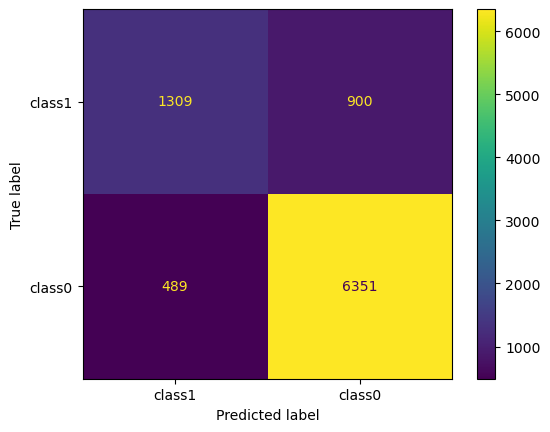

In [189]:
# Assuming lr is an instance of LogisticRegression class
cm = confusion_matrix(lr.y_test,lr.predict(lr.X_test), labels=[1,0])
# Calculate confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["class1","class0"])
disp.plot()
plt.show()



Gaussian Naive Bayes

In [190]:
class NaiveBayes:

    def __init__(self, X, y, alpha=0,index_list=[]):

        self.X = X
        self.y = y
        self.alpha = alpha
        self.index_list=index_list

    def trainTestSplit(self):

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = 0.3, random_state = 20)

    def probability(self, X, prior, dist1, dist2):
        return prior * dist1 * dist2
    def fitDistribution(self,X):
        mean =np.mean(X)
        std=np.std(X)
        dist=norm(mean,std)
        return dist
    def runModel(self):
        m = 2
        alpha = self.alpha
        self.trainTestSplit()
        #code to split data into y=0 and y=1 class
        self.X0_train = self.X_train[self.y_train == 0]
        self.X1_train = self.X_train[self.y_train == 1]
        # calculating priors on y
        self.prior_y0 = len(self.X0_train)/len(self.X_train)
        self.prior_y1 = len(self.X1_train)/len(self.X_train)
        category_indexes=np.arange(0,len(self.X_train.columns))[6:]
        self.distribution_lists_class0=[]
        self.distribution_lists_class1=[]
        for x in self.index_list:
            self.distribution_lists_class0.append(self.fitDistribution(self.X0_train[:x]))
            self.distribution_lists_class1.append(self.fitDistribution(self.X1_train[:x]))

        self.likelyhood_list_class0_value0=[]
        self.likelyhood_list_class0_value1=[]
        self.likelyhood_list_class1_value0=[]
        self.likelyhood_list_class1_value1=[]
        for index in tqdm(category_indexes, colour='red'):
            for class_value in [0,1]:
                for actual_value in [0,1]:
                    if class_value==0:
                        if actual_value==0:
                            self.likelyhood_list_class0_value0.append((len(self.X0_train[:index][self.X0_train[:index]==0])+
                                                                       alpha)/(len(self.X0_train)+(m*alpha)))
                        if actual_value==1:
                            self.likelyhood_list_class0_value1.append((len(self.X0_train[:index][self.X0_train[:index]==1])+
                                                                       alpha)/(len(self.X0_train)+(m*alpha)))
                    else :

                        if actual_value==0:
                            self.likelyhood_list_class1_value0.append((len(self.X1_train[:index][self.X1_train[:index]==0])+
                                                                       alpha)/(len(self.X1_train)+(m*alpha)))
                        if actual_value==1:
                            self.likelyhood_list_class1_value1.append((len(self.X1_train[:index][self.X1_train[:index]==1])+
                                                                       alpha)/(len(self.X1_train)+(m*alpha)))


    def predict(self):
        self.prediction_list=[]
        for sample in self.X_test.iterrows():
            class_0_probability=1
            class_1_probability=1
            #for i in index_list:
                    #class_0_probability=class_0_probability*self.distribution_lists_class0[i].pdf(float(list(sample[1])[i]))
                    #class_1_probability=class_1_probability*self.distribution_lists_class1[i].pdf(float(list(sample[1])[i]))
            for index in np.arange(0,len(self.X_train.columns)-6):
                # sample belongs to class 0
                if list(sample[1])[index] == 1:
                    class_0_probability = class_0_probability*self.likelyhood_list_class0_value1[index]
                else:
                    class_0_probability =class_0_probability*self.likelyhood_list_class0_value0[index]

            # sample belongs to class 1

                if list(sample[1])[index] == 1:
                    class_1_probability = class_1_probability*self.likelyhood_list_class1_value1[index]
                else:
                    class_1_probability =class_1_probability* self.likelyhood_list_class1_value0[index]


            py0 = class_0_probability*self.prior_y0
            py1 = class_1_probability*self.prior_y1

            if py0>py1:
                self.prediction_list.append(0)
            else:
                self.prediction_list.append(1)




In [191]:
model=NaiveBayes(X=X,y=y,alpha=0,index_list=[0,1,2,3,4,5])

In [192]:
model.runModel()

/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/pandas/core/nanops.py:441: ComplexWarning: Casting complex values to real discards the imaginary part
  values = values.astype("float64")
/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:

In [193]:
model.prior_y0

0.7492540141145266

In [194]:
model.predict()

In [195]:
fl = np.array(model.prediction_list)
accuracy_train(model.y_test,fl)

y_preds:  [1 1 1 ... 1 1 1]
y_preds shape:  (9049,)
misclassification rate 0.7553320808929164
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6835
           1       0.24      1.00      0.39      2214

    accuracy                           0.24      9049
   macro avg       0.12      0.50      0.20      9049
weighted avg       0.06      0.24      0.10      9049

Train_Time:  0:00:18.394342


/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

0.7553320808929164

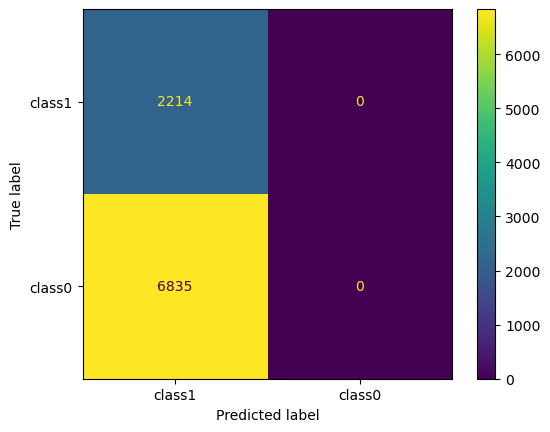

In [196]:
cm = confusion_matrix(model.y_test,fl, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["class1","class0"])
disp.plot()
plt.show()


In [197]:
@dataclass
class svm:
    lambda_param: float
    lr: float
    max_iteration: int
        
    def accuracy_test(self,y_preds):
        count0 = 0
        count1 = 0
        total_correct = 0
        for i in range(len(self.y)):
                if int(self.y[i]) == int(y_preds[i]):
                    total_correct += 1
                else:
                    if self.y[i] ==0:
                        count0+=1
                    elif self.y[i] ==1:
                        count1+=1
        
        total_wrong = count0+count1
        rate = total_wrong/(total_correct+total_wrong)
        print('misclassification rate',rate)
        print('testing error', (rate)*100)
        print(classification_report(self.y, y_preds))
    def fit(self, X, y):
        N, n_features = X.shape
        self.w = np.ones(n_features)
        self.b = 0
        self.y=y
        X = X.astype(np.float64)
        y = y.astype(np.float64)  # Convert y to float64
        y_ = np.where(y <= 0, -1, 1)

        def convert_to_numeric(column):
            try:
                return pd.to_numeric(column)
            except ValueError:
                return column

        X_numeric = np.apply_along_axis(convert_to_numeric, axis=0, arr=X)  # Convert each column to numeric values
        X_numeric = np.nan_to_num(X_numeric)  # Replace NaN values with 0

        for i in tqdm(range(self.max_iteration), colour='blue'):
            for idx, x_i in enumerate(X_numeric):
                condition = (y_[idx] * (np.dot(x_i, self.w) + self.b)) >= 1
                if condition:
                    self.w -= 2 * self.lr * self.lambda_param * self.w
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= -y_[idx]
        self.predict=[]
        for i,x_i in enumerate(X_numeric):
            if (np.dot(x_i, self.w) + self.b) >= 0:
                self.predict.append(1)
            else:
                self.predict.append(0)
        

In [198]:
SupportVectorMachine= svm(lr=0.0001, max_iteration = 500,lambda_param=0.001)

In [199]:
SupportVectorMachine.fit(X[12000:14000],y[12000:14000])


/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1181: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
100%|█████████████████████████████████████████| 500/500 [00:10<00:00, 45.63it/s]


In [200]:
SupportVectorMachine.w

array([-1.24752591,  0.89741222,  0.44056385,  0.06992935, -0.33595141,
       -0.61855921, -0.03716613,  0.13566167, -0.31736985, -0.40955241,
        0.06585211,  0.01596523,  0.00828539, -0.36715725, -0.33697052,
        0.6029879 ,  0.74009139,  1.13554001,  0.53878837,  0.41749154,
        0.40230534,  0.06033875,  0.24504675,  0.09943304,  1.03016226,
        0.55717586,  0.48926595,  0.32833502,  0.5671245 ,  0.18232482,
        0.70875817,  0.37539947,  0.85252466,  0.20809628,  0.42744326,
        0.72702927,  0.18607586,  0.07438682,  0.91024598,  0.34870322,
        0.60274535,  0.47446882, -0.02969498, -0.09203796,  0.53276681,
        0.07323079,  0.14136189,  0.62931611,  0.90638387, -0.09930348,
        0.44830826,  0.7465486 ,  0.56857768,  0.11177205,  0.41519907,
       -0.03004173,  0.80962975,  1.31263001,  0.56559559,  0.53025896,
        0.19536421,  0.2442723 ,  0.80025878, -0.31785481,  0.0766714 ,
        1.46400826,  0.54795263,  0.80890476,  1.20540911,  1.53

In [201]:
SupportVectorMachine.b

-4

In [202]:
SupportVectorMachine.predict

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,


/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:2877: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


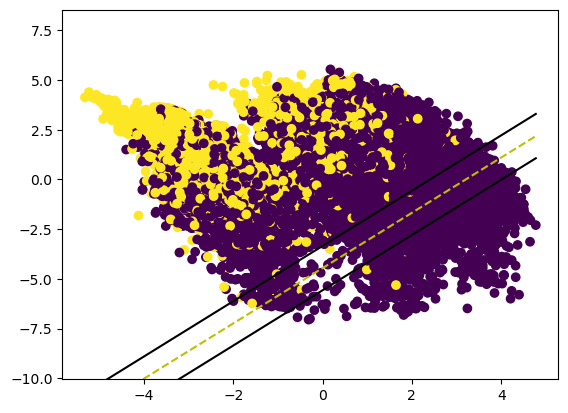

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors


def visualize_svm(X, y, clf):
    def get_hyperplane_value(x, w, b, offset):
        # Function to get the y-value of the hyperplane given x, weights, bias, and offset
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X.iloc[:,0], X.iloc[:,1], marker='o',c=y)
# Define the x-range for plotting the hyperplane
    x0_1 = np.amin(X.iloc[:,0])
    x0_2 = np.amax(X.iloc[:,0])
# Calculate y-values for the hyperplane and its margins
    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')
# Set the y-axis limits
    x1_min = np.amin(X.iloc[:,1])
    x1_max = np.amax(X.iloc[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.show()

    
    
    
colors = ['blue','red']
cmap = pltcolors.ListedColormap(colors)


def generateBatchBipolar(n, mu=0.5, sigma=0.2):
    """ Two gaussian clouds on each side of the origin """
    X = np.random.normal(mu, sigma, (n, 2))
    yB = np.random.uniform(0, 1, n) > 0.5
    # y is in {-1, 1}
    y = 2. * yB - 1
    X *= y[:, np.newaxis]
    X -= X.mean(axis=0)
    return X, y

def plotLine(ax, xRange, w, x0, label, color='grey', linestyle='-', alpha=1.):
    """ Plot a (separating) line given the normal vector (weights) and point of intercept """
    if type(x0) == int or type(x0) == float or type(x0) == np.float64:
        x0 = [0, -x0 / w[1]]
    yy = -(w[0] / w[1]) * (xRange - x0[0]) + x0[1]
    ax.plot(xRange, yy, color=color, label=label, linestyle=linestyle)
    
    
def plotSvm(X, y, support=None, w=None, intercept=0., label='Data', separatorLabel='Separator', 
            ax=None, bound=[[-1., 1.], [-1., 1.]]):
    """ Plot the SVM separation, and margin """
    if ax is None:
        fig, ax = plt.subplots(1)
    
    im = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap=cmap, alpha=0.5, label=label)
    if support is not None:
        ax.scatter(support[:,0], support[:,1], label='Support', s=80, facecolors='none', 
                   edgecolors='y', color='y')
        print("Number of support vectors = %d" % (len(support)))
    if w is not None:
        xx = np.array(bound[0])
        plotLine(ax, xx, w, intercept, separatorLabel)
        # Plot margin
        if support is not None:
            signedDist = np.matmul(support, w)
            margin = np.max(signedDist) - np.min(signedDist) * np.sqrt(np.dot(w, w))
            supportMaxNeg = support[np.argmin(signedDist)]
            plotLine(ax, xx, w, supportMaxNeg, 'Margin -', linestyle='-.', alpha=0.8)
            supportMaxPos = support[np.argmax(signedDist)]
            plotLine(ax, xx, w, supportMaxPos, 'Margin +', linestyle='--', alpha=0.8)
            ax.set_title('Margin = %.3f' % (margin))
    ax.legend(loc='upper left')
    ax.grid()
    ax.set_xlim(bound[0])
    ax.set_ylim(bound[1])
    cb = plt.colorbar(im, ax=ax)
    loc = np.arange(-1,1,1)
    cb.set_ticks(loc)
    cb.set_ticklabels(['-1','1'])

# Assuming SupportVectorMachine is your trained SVM model and X, y are your data
visualize_svm( X.iloc[:,:2],y,SupportVectorMachine)


In [204]:
SupportVectorMachine.accuracy_test(SupportVectorMachine.predict)

misclassification rate 0.174
testing error 17.4
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1510
           1       0.92      0.32      0.47       490

    accuracy                           0.83      2000
   macro avg       0.87      0.65      0.68      2000
weighted avg       0.84      0.83      0.79      2000



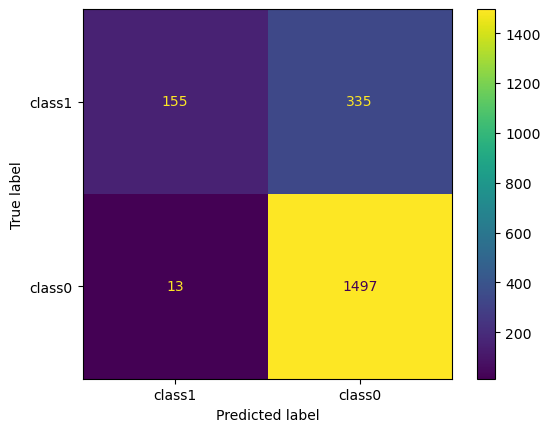

In [205]:
cm = confusion_matrix(SupportVectorMachine.y,SupportVectorMachine.predict, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["class1","class0"])
disp.plot()
plt.show()


/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


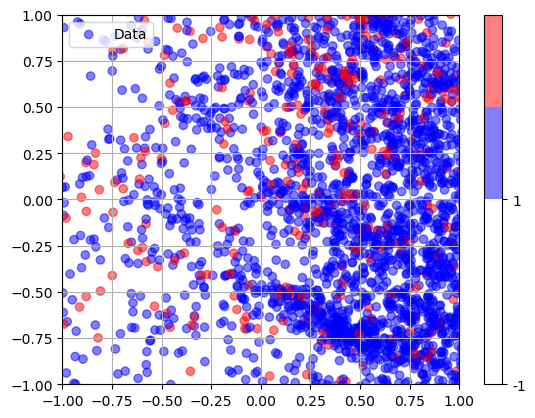

In [206]:
plotSvm(X.iloc[:,:2],y, support=None, w=None, intercept=0., label='Data', separatorLabel='Separator', 
            ax=None, bound=[[-1., 1.], [-1., 1.]])

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X[12000:14000], y[12000:14000], test_size=0.3,shuffle=True)

In [208]:
from sklearn.metrics import classification_report
from datetime import datetime
class KNearestNeighbor:

    def __init__(self,X_train,y_train,X_test,y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test


    def euclidean_dist(self,pointA, pointB):
        distance = np.square(pointA - pointB) # (ai-bi)**2 for every point in the vectors
        distance = np.sum(distance) # adds all values
        distance = np.sqrt(distance)
        return distance

    def distance_from_all_training(self,test_point):
        dist_array = np.array([])
        for train_point, row in self.X_train.iterrows():
            dist = self.euclidean_dist(test_point, train_point)
            dist_array = np.append(dist_array, dist)
        return dist_array


    def accuracy_test(self,y_preds):
        test_end_time = datetime.now()
        count0 = 0
        count1 = 0
        total_correct = 0
        for i in range(len(self.y_test)):
                if int(self.y_test[i]) == int(y_preds[i]):
                    total_correct += 1
                else:
                    if self.y_test[i] ==0:
                        count0+=1
                    elif self.y_test[i] ==1:
                        count1+=1
        test_time = test_end_time - self.test_start_time
        print('Test Time: ', test_time)
        total_wrong = count0+count1
        rate = total_wrong/(total_correct+total_wrong)
        print('misclassification rate',rate)
        print('testing error', (rate)*100)
        print(classification_report(self.y_test, y_preds))


    def KNNClassifier_test(self,k=19):
        self.test_start_time = datetime.now()
        predictions = np.array([])
        train_target = self.y_train
        train_target = train_target.reshape(-1,1)
        for test_point, row in self.X_test.iterrows():
            dist_array = self.distance_from_all_training(test_point).reshape(-1,1)
            neighbors = np.concatenate((dist_array, train_target),axis = 1,)
            neighbors_sorted = neighbors[neighbors[:, 0].argsort()]  # sorts training points on the basis of distance
            k_neighbors = neighbors_sorted[:k] # selects k-nearest neighbors
            frequency = np.unique(k_neighbors[:, 1], return_counts=True)
            target_class = frequency[0][frequency[1].argmax()] # selects label with highest frequency
            predictions = np.append(predictions, target_class)
        return predictions

In [209]:
knn = KNearestNeighbor(X_train,y_train,X_test,y_test)

In [210]:
training_predicted = knn.KNNClassifier_test()

In [211]:
training_predicted

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [212]:
knn.accuracy_test(y_preds = training_predicted)

Test Time:  0:00:36.261215
misclassification rate 0.26
testing error 26.0
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       446
           1       0.33      0.01      0.03       154

    accuracy                           0.74       600
   macro avg       0.54      0.50      0.44       600
weighted avg       0.64      0.74      0.64       600



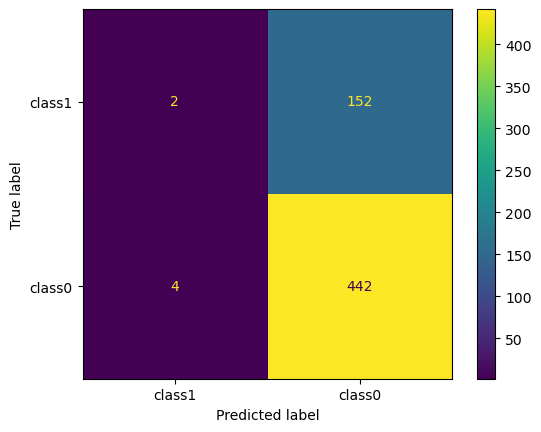

In [213]:
cm = confusion_matrix(knn.y_test,training_predicted, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["class1","class0"])
disp.plot()
plt.show()


/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:564: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(self.convert_xunits(offsets[:, 0]), 'float'),
/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:565: ComplexWarning: Casting complex values to real discards the imaginary part
  np.asarray(self.convert_yunits(offsets[:, 1]), 'float')))
/Users/bharadwajpalakodeti/opt/anaconda3/lib/python3.9/site-packages/matplotlib/colors.py:277: ComplexWa

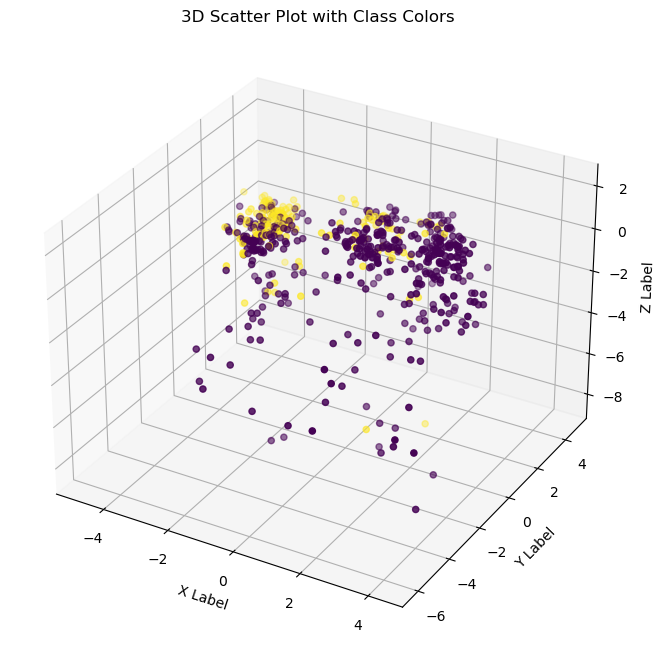

In [214]:
  # fig, ax = plt.subplots()
  # plt.scatter(knn.X_test.iloc[:,0], knn.X_test.iloc[:,1], marker="o", c=training_predicted)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming you've instantiated the KNearestNeighbor class and have your predictions
knn = KNearestNeighbor(X_train, y_train, X_test, y_test)
training_predicted = knn.KNNClassifier_test()

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the points with different colors for different classes
ax.scatter(knn.X_test.iloc[:, 0], knn.X_test.iloc[:, 1], knn.X_test.iloc[:, 2], c=knn.y_test, cmap='viridis')

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot with Class Colors')

plt.show()

